In [1]:
import pandas as pd
import numpy as np
import warnings
pd.options.display.max_rows = 30
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/vgames2.csv',index_col=0) # 데이터 불러오기

In [3]:
df.shape 

(16598, 9)

In [4]:
df.info() #데이터 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df.duplicated().sum() #중복 개수 확인

1

In [6]:
df.Name.duplicated().sum() #중복되는 이름의 게임이 있는지 확인

5105

In [7]:
df.isnull().sum() #결측치 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df[df.Year.isnull()] # 결측치가 어떤 형태인지 확인

Name Platform  Year       Genre  \
32                                       Rock Band     X360   NaN        Misc   
110     Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   NaN      Racing   
274    Jewel Link Chronicles: Mountains of Madness       DS   NaN      Puzzle   
359             Majesty 2: The Fantasy Kingdom Sim     X360   NaN  Simulation   
431                                     Famista 64      N64   NaN      Sports   
...                                            ...      ...   ...         ...   
16241                                Freaky Flyers       GC   NaN      Racing   
16276                               Space Invaders     2600   NaN     Shooter   
16279                                Madden NFL 11      Wii   NaN      Sports   
16426                               Yoostar on MTV     X360   NaN        Misc   
16433                                  Bejeweled 3     X360   NaN      Puzzle   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
32        Electronic Arts     1.93     0.34        0        0.21  
110               Unknown        0        0     0.02           0  
274             Avanquest        0     0.06        0        0.01  
359               Unknown     0.03        0        0           0  
431    Namco Bandai Games        0        0     0.17        0.03  
...                   ...      ...      ...      ...         ...  
16241             Unknown     0.01        0        0           0  
16276               Atari     2.36     0.14       0M        0.03  
16279             Unknown      0.7        0        0         50K  
16426             Unknown     0.06        0        0           0  
16433             Unknown     0.13        0        0        0.01  

[271 rows x 9 columns]

In [9]:
df_name = df[df.Name.duplicated(keep=False)].sort_values(by=['Name','Year'],axis=0) # 이름이 같은 데이터가 어떤 형태를 취하는지 확인
df_name

Name Platform    Year   Genre  \
2661         007: Quantum of Solace      PS2  2008.0  Action   
5505         007: Quantum of Solace      Wii  2008.0  Action   
6840         007: Quantum of Solace      PS3  2008.0  Action   
8868         007: Quantum of Solace       PC  2008.0  Action   
9466         007: Quantum of Solace       DS  2008.0  Action   
...                             ...      ...     ...     ...   
11281     pro evolution soccer 2011      PSP  2010.0  Sports   
13758     pro evolution soccer 2011      Wii  2010.0  Sports   
16252     pro evolution soccer 2011      PS2  2010.0  Sports   
3063   uDraw Studio: Instant Artist     X360  2011.0    Misc   
15022  uDraw Studio: Instant Artist      Wii  2011.0    Misc   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2661                     Activision     0.17        0        0        0.26  
5505                     Activision      0.3     0.29    0.01M        0.07  
6840                     Activision     0.43     0.52     0.02         0.2  
8868                     Activision     0.01     0.01        0           0  
9466                     Activision     0.11     0.01        0        0.01  
...                             ...      ...      ...      ...         ...  
11281  Konami Digital Entertainment     0.05      0.3     0.29        0.16  
13758  Konami Digital Entertainment     0.08      0.1     0.03        0.02  
16252  Konami Digital Entertainment     0.04     0.21     0.05        0.11  
3063                            THQ     0.01     0.01        0           0  
15022                           THQ     0.08     0.09        0        0.02  

[7880 rows x 9 columns]

In [10]:
df_na = df[df.Name.duplicated(keep=False)].sort_values(by=['Name','Year'],axis=0).fillna(method='pad') # 이름이 같은 데이터를 이름,날짜 순으로 정렳한 뒤, 결측치가 있으면 앞 순서의 데이터로 대체

In [11]:
na_list = df_name[df_name.Year.isnull() | df_name.Genre.isnull()].index # df_name의 null 인덱스를 리스트로 저장
na_list

Int64Index([11642, 10897, 14120, 16556,  7151,  5714,  6376, 10535,  3471,
              676,
            ...
             4502,  3896,  4125,  7132,  8601,  6119,  8056,  9185, 15777,
             2071],
           dtype='int64', length=169)

In [12]:
for i in na_list:
    df.loc[i] = df_na.loc[i] # 대체한 결측치를 df의 인덱스에 맞게 수정

In [13]:
df.isnull().sum() # 남은 결측치확인

Name             0
Platform         0
Year           122
Genre           30
Publisher       52
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [14]:
df.Genre.fillna('Misc',inplace=True) # 장르의 결측치는 Misc로 대체

In [15]:
df.Publisher.fillna('Unknown',inplace=True) # 퍼블리셔의 결측치는 Unknown로 대체

In [16]:
df = df.dropna() # 나머지 해결되지 않는 결측치는 drop

In [17]:
df.isnull().sum() # 남은 결측치확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [18]:
df

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC  2006.0   
16595                     Rainbow Islands: Revolution      PSP  2005.0   
16596                                        NBA 2K16      PS3  2015.0   
16597                     Toukiden: The Age of Demons      PSV  2013.0   
16598                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16476 rows x 9 columns]

In [19]:
df = df.drop_duplicates()#중복자료 drop

In [20]:
df.duplicated().sum()

0

In [21]:
df.loc[df['Year'] <= 20, 'Year'] = df['Year']+2000 # 0~20까지 값을 갖는 년도는 20xx년으로 판단됨. 그러므로 값을 수정

In [22]:
df.loc[df['Year'] <= 99, 'Year'] = df['Year']+1900 # 90~99까지 값을 갖는 년도는 20xx년으로 판단됨. 그러므로 값을 수정

In [23]:
(df['Year']<=1000).sum() # 기입에 문제가 있는 년도가 있는지 확인

0

In [24]:
name = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for i in name : df[i] = df[i].replace({'K': '/1e3', 'M': ''}, regex=True).map(pd.eval) # 지역별 판매량에 대하여, K,M으로 뒤죽박죽인 단위를 M으로 맞춰줌

In [25]:
df.head(30)

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
6                              Power Pro Kun Pocket 8       DS  2005.0   
7               JASF: Jane's Advanced Strike Fighters       PC  2011.0   
8                      Samurai Warriors: State of War      PSP  2005.0   
9                                          Imabikisou      PS3  2007.0   
10  The Penguins of Madagascar: Dr. Blowhole Retur...      PS3  2011.0   
11                                        Ford Racing       PS  2001.0   
12         Harvest Moon: More Friends of Mineral Town      GBA  2003.0   
13                                      Mount & Blade       PC  2008.0   
14               The Professor's Brain Trainer: Logic       DS  2005.0   
15                                         Zoids Dash       DS  2006.0   
16                                        Mini Ninjas      PS3  2009.0   
17                                    Rise of Nations       PC  2003.0   
18               Hajime no Ippo: The Fighting! (2014)      PS3  2014.0   
19                                      Grand Kingdom      PS4  2015.0   
20                                   Tropico Reloaded       PC  2009.0   
21                             Ty the Tasmanian Tiger      PS2  2002.0   
22                                 Ghost in the Shell       PS  1997.0   
23                         Cabela's Dangerous Hunts 2       XB  2005.0   
24                             Don Bradman Cricket 14     X360  2014.0   
25                           Injustice: Gods Among Us      PS3  2013.0   
26                                           Dr. Muto       GC  2002.0   
27                Starwinder: The Ultimate Space Race       PS  1996.0   
28                                     World of Tanks       PC  2011.0   
29                            Famicom Mini: Makaimura      GBA  2004.0   
30           McGrath Vs. Pastrana Freestyle Motocross       PS  2000.0   

           Genre                               Publisher  NA_Sales  EU_Sales  \
1         Action                               Destineer      0.04      0.00   
2         Action                      Namco Bandai Games      0.17      0.00   
3      Adventure                               Alchemist      0.00      0.00   
4           Misc                               Zoo Games      0.04      0.00   
5       Platform                             D3Publisher      0.12      0.09   
6         Sports            Konami Digital Entertainment      0.00      0.00   
7     Simulation                             Deep Silver      0.02      0.01   
8         Action                              Tecmo Koei      0.07      0.00   
9      Adventure                                    Sega      0.00      0.00   
10        Action                                     THQ      0.04      0.03   
11        Racing                      Empire Interactive      0.48      0.33   
12    Simulation                                 Ubisoft      0.14      0.05   
13  Role-Playing                     Paradox Interactive      0.00      0.02   
14        Puzzle                               505 Games      0.02      0.00   
15  Role-Playing                        Tomy Corporation      0.00      0.00   
16        Action                       Eidos Interactive      0.14      0.16   
17      Strategy                  Microsoft Game Studios      0.01      0.02   
18        Sports                      Namco Bandai Games      0.00      0.00   
19  Role-Playing                    Nippon Ichi Software      0.02      0.00   
20      Strategy                           Kalypso Media      0.00      0.02   
21      Platform                         Electronic Arts      0.57      0.

In [26]:
df.info() # 전처리 완료.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16475 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16475 non-null  object 
 1   Platform     16475 non-null  object 
 2   Year         16475 non-null  float64
 3   Genre        16475 non-null  object 
 4   Publisher    16475 non-null  object 
 5   NA_Sales     16475 non-null  float64
 6   EU_Sales     16475 non-null  float64
 7   JP_Sales     16475 non-null  float64
 8   Other_Sales  16475 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


In [27]:
df_copy = df # 데이터프레임 백업

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

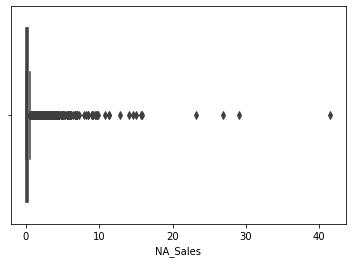

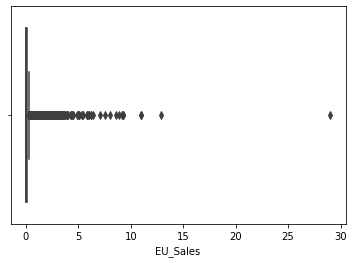

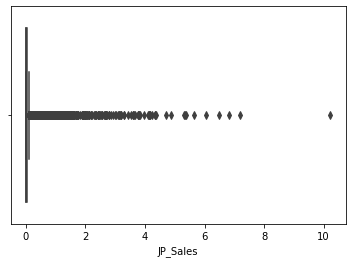

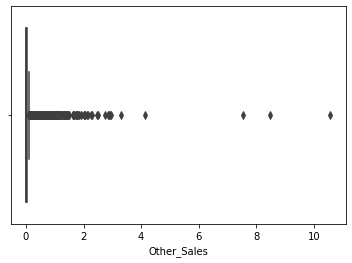

In [29]:
for i in name : sns.boxplot(x=i,data=df); plt.show()

In [30]:
#몇가지 관측값이 이상치로 보임

In [31]:
df.query('NA_Sales >= 5') # 확인 결과 이상치가 관측자의 실수에 의해 측정된 것이 아닌, 실제 관측결과가 상당히 높게 나타난것으로 보여 이상치 처리는 하지 않겠음.

Name Platform    Year     Genre  \
123    Call of Duty 4: Modern Warfare     X360  2007.0   Shooter   
224                      Just Dance 3      Wii  2011.0      Misc   
578                     Mario Kart 64      N64  1996.0    Racing   
1006           Gran Turismo 3: A-Spec      PS2  2001.0    Racing   
1204                           Tetris       GB  1989.0    Puzzle   
...                               ...      ...     ...       ...   
14577                          Halo 4     X360  2012.0   Shooter   
14670   Grand Theft Auto: San Andreas      PS2  2004.0    Action   
14857             Super Mario Bros. 3      NES  1988.0  Platform   
14903         Super Smash Bros. Brawl      Wii  2008.0  Fighting   
16532       New Super Mario Bros. Wii      Wii  2009.0  Platform   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
123                     Activision      5.91      2.38      0.13         0.90  
224                        Ubisoft      6.05      3.15      0.00         1.07  
578                       Nintendo      5.55      1.94      2.23         0.15  
1006   Sony Computer Entertainment      6.85      5.09      1.87         1.16  
1204                      Nintendo     23.20      2.26      4.22         0.58  
...                            ...       ...       ...       ...          ...  
14577       Microsoft Game Studios      6.63      2.36      0.04         0.73  
14670         Take-Two Interactive      9.43      0.40      0.41        10.57  
14857                     Nintendo      9.54      3.44      3.84         0.46  
14903                     Nintendo      6.75      2.61      2.66         1.02  
16532                     Nintendo     14.59      7.06      4.70         2.26  

[58 rows x 9 columns]

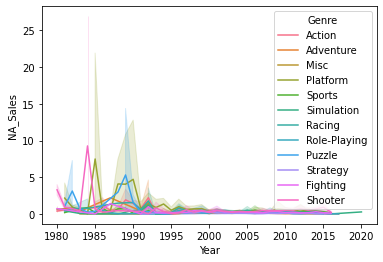

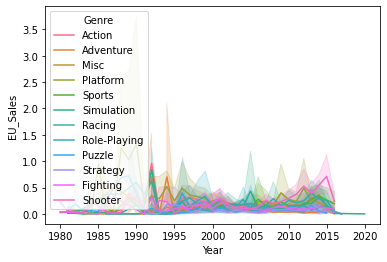

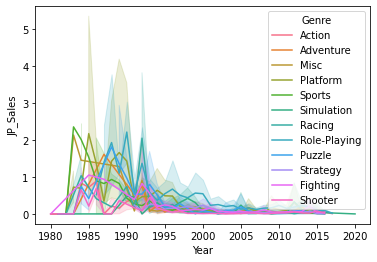

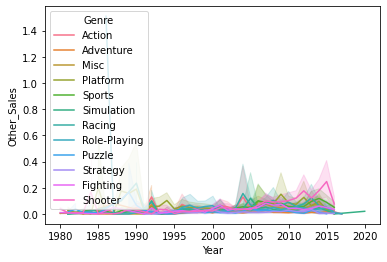

In [32]:
for i in name : sns.lineplot(x='Year',y=i,hue="Genre",data=df); plt.show()

In [33]:
#장르별 라인플롯을 그려본 결과, 지역별 선호장르가 다를것으로 보임

In [34]:
game_genre = df.Genre.unique()

In [35]:
game_genre

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [36]:
NA_sales_dic = {}
tmp = 0
for i in game_genre : NA_sales_dic[tmp] = df.query(f'Genre == "{i}"').NA_Sales; tmp +=1

In [37]:
len(NA_sales_dic)

12

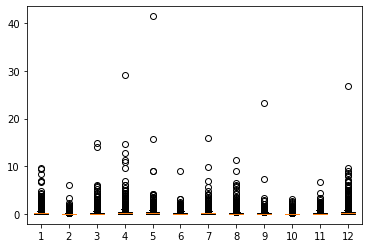

In [38]:
plot_data = []
for i in range (len(NA_sales_dic)) : plot_data.append(NA_sales_dic[i])
ax = plt.boxplot(plot_data)
plt.show()

In [39]:
import scipy.stats as stats
F_statistic, pVal = stats.f_oneway(df.NA_Sales,df.EU_Sales,df.JP_Sales,df.Other_Sales) # 

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=578.4, p=0.00000


In [40]:
import pingouin as pg

aov = pg.anova(data=df, dv='NA_Sales', between='Genre', detailed=True) # ANOVA 분석 결과 장르 별 흥행 차이가 분명히 있다.
print(aov)

   Source            SS     DF         MS          F         p-unc       np2
0   Genre    167.387096     11  15.217009  23.005728  1.561744e-47  0.015139
1  Within  10889.358166  16463   0.661444        NaN           NaN       NaN


In [41]:
pd.options.display.max_rows = None
pt = pg.pairwise_gameshowell(data=df, dv='NA_Sales', between='Genre') # gameshowell 다중비교 실행, 결과는 Platform > Shooter > Sports > Racing > Action ... 순
pt

A             B   mean(A)   mean(B)      diff        se  \
0         Action     Adventure  0.265087  0.080094  0.184993  0.012434   
1         Action      Fighting  0.265087  0.263294  0.001793  0.020370   
2         Action          Misc  0.265087  0.240501  0.024585  0.019421   
3         Action      Platform  0.265087  0.508527 -0.243441  0.051971   
4         Action        Puzzle  0.265087  0.213958  0.051129  0.045766   
5         Action        Racing  0.265087  0.289684 -0.024598  0.023440   
6         Action  Role-Playing  0.265087  0.216764  0.048323  0.019916   
7         Action       Shooter  0.265087  0.447005 -0.181919  0.034894   
8         Action    Simulation  0.265087  0.212865  0.052221  0.018877   
9         Action        Sports  0.265087  0.291550 -0.026464  0.023760   
10        Action      Strategy  0.265087  0.101126  0.163961  0.015218   
11     Adventure      Fighting  0.080094  0.263294 -0.183200  0.019308   
12     Adventure          Misc  0.080094  0.240501 -0.160407  0.018304   
13     Adventure      Platform  0.080094  0.508527 -0.428433  0.051564   
14     Adventure        Puzzle  0.080094  0.213958 -0.133864  0.045304   
15     Adventure        Racing  0.080094  0.289684 -0.209590  0.022523   
16     Adventure  Role-Playing  0.080094  0.216764 -0.136670  0.018829   
17     Adventure       Shooter  0.080094  0.447005 -0.366911  0.034285   
18     Adventure    Simulation  0.080094  0.212865 -0.132771  0.017727   
19     Adventure        Sports  0.080094  0.291550 -0.211456  0.022856   
20     Adventure      Strategy  0.080094  0.101126 -0.021032  0.013765   
21      Fighting          Misc  0.263294  0.240501  0.022792  0.024400   
22      Fighting      Platform  0.263294  0.508527 -0.245234  0.054030   
23      Fighting        Puzzle  0.263294  0.213958  0.049336  0.048091   
24      Fighting        Racing  0.263294  0.289684 -0.026391  0.027706   
25      Fighting  Role-Playing  0.263294  0.216764  0.046530  0.024796   
26      Fighting       Shooter  0.263294  0.447005 -0.183712  0.037891   
27      Fighting    Simulation  0.263294  0.212865  0.050428  0.023970   
28      Fighting        Sports  0.263294  0.291550 -0.028257  0.027977   
29      Fighting      Strategy  0.263294  0.101126  0.162168  0.021208   
30          Misc      Platform  0.240501  0.508527 -0.268026  0.053679   
31          Misc        Puzzle  0.240501  0.213958  0.026543  0.047697   
32          Misc        Racing  0.240501  0.289684 -0.049183  0.027016   
33          Misc  Role-Playing  0.240501  0.216764  0.023737  0.024023   
34          Misc       Shooter  0.240501  0.447005 -0.206504  0.037390   
35          Misc    Simulation  0.240501  0.212865  0.027636  0.023169   
36          Misc        Sports  0.240501  0.291550 -0.051049  0.027294   
37          Misc      Strategy  0.240501  0.101126  0.139375  0.020298   
38      Platform        Puzzle  0.508527  0.213958  0.294569  0.067815   
39      Platform        Racing  0.508527  0.289684  0.218843  0.055260   
40      Platform  Role-Playing  0.508527  0.216764  0.291763  0.053860   
41      Platform       Shooter  0.508527  0.447005  0.061522  0.061007   
42      Platform    Simulation  0.508527  0.212865  0.295662  0.053485   
43      Platform        Sports  0.508527  0.291550  0.216977  0.055397   
44      Platform      Strategy  0.508527  0.101126  0.407401  0.052306   
45        Puzzle        Racing  0.213958  0.289684 -0.075726  0.049470   
46        Puzzle  Role-Playing  0.213958  0.216764 -0.002806  0.047901   
47        Puzzle       Shooter  0.213958  0.447005 -0.233047  0.055816   
48        Puzzle    Simulation  0.213958  0.212865  0.001092  0.047478   
49        Puzzle        Sports  0.213958  0.291550 -0.077592  0.049622   
50        Puzzle      Strategy  0.213958  0.101126  0.112832  0.046146   
51        Racing  Role-Playing  0.289684  0.216764  0.072920  0.027374   
52        Racing       Shooter  0.289684  0.447005 -0.157321  0.039626   
53        Racing   

In [42]:
pt['AB_dif'] = pt['mean(A)']/pt['mean(B)']
pt['BA_dif'] = pt['mean(B)']/pt['mean(A)']

In [43]:
n = len(pt[((pt['A']=='Platform') | (pt['B']=='Platform'))& (pt['pval']<=0.05)])
a = pt[((pt['A']=='Platform') | (pt['B']=='Platform'))& (pt['pval']<=0.05)& (pt['BA_dif']>1)]['BA_dif'].sum()
b = pt[((pt['A']=='Platform') | (pt['B']=='Platform'))& (pt['pval']<=0.05)& (pt['AB_dif']>1)]['AB_dif'].sum()
print((a+b)/n) #가장 선호도가 높은 장르에 대하여 p-value가 0.05이하(차이가 유의)한 차이를 보이는 장르에 대한 배율을 계산

2.7953366772003125


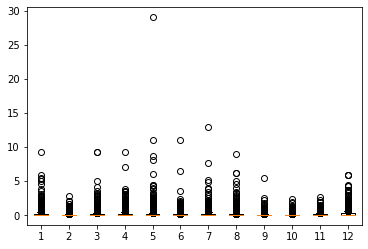

In [44]:
EU_sales_dic = {}
tmp = 0
plot_data = []
for i in game_genre : EU_sales_dic[tmp] = df.query(f'Genre == "{i}"').EU_Sales; tmp +=1
for i in range (len(EU_sales_dic)) : plot_data.append(EU_sales_dic[i])
ax = plt.boxplot(plot_data)
plt.show()

In [45]:
aov = pg.anova(data=df, dv='EU_Sales', between='Genre', detailed=True)
print(aov)

   Source           SS     DF        MS          F         p-unc       np2
0   Genre    41.473483     11  3.770317  14.799489  5.104694e-29  0.009792
1  Within  4194.112687  16463  0.254760        NaN           NaN       NaN


In [46]:
pd.options.display.max_rows = None
pt = pg.pairwise_gameshowell(data=df, dv='EU_Sales', between='Genre') # gameshowell 다중비교 실행, 결과는 Shooter > Platform > Racing > Sports > Action ... 순
pt

A             B   mean(A)   mean(B)      diff        se  \
0         Action     Adventure  0.158966  0.050000  0.108966  0.008687   
1         Action      Fighting  0.158966  0.119120  0.039846  0.011241   
2         Action          Misc  0.158966  0.126803  0.032162  0.012989   
3         Action      Platform  0.158966  0.229612 -0.070646  0.021219   
4         Action        Puzzle  0.158966  0.088494  0.070472  0.015226   
5         Action        Racing  0.158966  0.192397 -0.033431  0.018089   
6         Action  Role-Playing  0.158966  0.124521  0.034445  0.014420   
7         Action       Shooter  0.158966  0.240893 -0.081927  0.016873   
8         Action    Simulation  0.158966  0.132433  0.026533  0.019080   
9         Action        Sports  0.158966  0.160925 -0.001959  0.017619   
10        Action      Strategy  0.158966  0.066889  0.092077  0.010308   
11     Adventure      Fighting  0.050000  0.119120 -0.069120  0.010006   
12     Adventure          Misc  0.050000  0.126803 -0.076803  0.011936   
13     Adventure      Platform  0.050000  0.229612 -0.179612  0.020592   
14     Adventure        Puzzle  0.050000  0.088494 -0.038494  0.014338   
15     Adventure        Racing  0.050000  0.192397 -0.142397  0.017348   
16     Adventure  Role-Playing  0.050000  0.124521 -0.074521  0.013480   
17     Adventure       Shooter  0.050000  0.240893 -0.190893  0.016077   
18     Adventure    Simulation  0.050000  0.132433 -0.082433  0.018380   
19     Adventure        Sports  0.050000  0.160925 -0.110925  0.016858   
20     Adventure      Strategy  0.050000  0.066889 -0.016889  0.008945   
21      Fighting          Misc  0.119120  0.126803 -0.007683  0.013906   
22      Fighting      Platform  0.119120  0.229612 -0.110492  0.021793   
23      Fighting        Puzzle  0.119120  0.088494  0.030626  0.016015   
24      Fighting        Racing  0.119120  0.192397 -0.073277  0.018758   
25      Fighting  Role-Playing  0.119120  0.124521 -0.005401  0.015251   
26      Fighting       Shooter  0.119120  0.240893 -0.121773  0.017589   
27      Fighting    Simulation  0.119120  0.132433 -0.013313  0.019716   
28      Fighting        Sports  0.119120  0.160925 -0.041805  0.018305   
29      Fighting      Strategy  0.119120  0.066889  0.052231  0.011442   
30          Misc      Platform  0.126803  0.229612 -0.102808  0.022743   
31          Misc        Puzzle  0.126803  0.088494  0.038310  0.017287   
32          Misc        Racing  0.126803  0.192397 -0.065593  0.019855   
33          Misc  Role-Playing  0.126803  0.124521  0.002283  0.016582   
34          Misc       Shooter  0.126803  0.240893 -0.114090  0.018754   
35          Misc    Simulation  0.126803  0.132433 -0.005629  0.020762   
36          Misc        Sports  0.126803  0.160925 -0.034122  0.019428   
37          Misc      Strategy  0.126803  0.066889  0.059915  0.013163   
38      Platform        Puzzle  0.229612  0.088494  0.141118  0.024091   
39      Platform        Racing  0.229612  0.192397  0.037215  0.025995   
40      Platform  Role-Playing  0.229612  0.124521  0.105091  0.023590   
41      Platform       Shooter  0.229612  0.240893 -0.011281  0.025165   
42      Platform    Simulation  0.229612  0.132433  0.097179  0.026695   
43      Platform        Sports  0.229612  0.160925  0.068687  0.025670   
44      Platform      Strategy  0.229612  0.066889  0.162723  0.021326   
45        Puzzle        Racing  0.088494  0.192397 -0.103903  0.021385   
46        Puzzle  Role-Playing  0.088494  0.124521 -0.036027  0.018387   
47        Puzzle       Shooter  0.088494  0.240893 -0.152399  0.020368   
48        Puzzle    Simulation  0.088494  0.132433 -0.043939  0.022230   
49        Puzzle        Sports  0.088494  0.160925 -0.072431  0.020989   
50        Puzzle      Strategy  0.088494  0.066889  0.021605  0.015375   
51        Racing  Role-Playing  0.192397  0.124521  0.067876  0.020819   
52        Racing       Shooter  0.192397  0.240893 -0.048496  0.022588   
53        Racing   

In [47]:
pt['AB_dif'] = pt['mean(A)']/pt['mean(B)']
pt['BA_dif'] = pt['mean(B)']/pt['mean(A)']
n = len(pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)])
a = pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)& (pt['BA_dif']>1)]['BA_dif'].sum()
b = pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)& (pt['AB_dif']>1)]['AB_dif'].sum()
print((a+b)/n)

2.4254720753203434


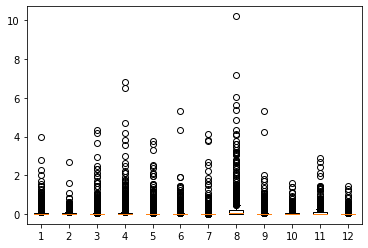

In [48]:
JP_sales_dic = {}
tmp = 0
plot_data = []
for i in game_genre : JP_sales_dic[tmp] = df.query(f'Genre == "{i}"').JP_Sales; tmp +=1
for i in range (len(JP_sales_dic)) : plot_data.append(JP_sales_dic[i])
ax = plt.boxplot(plot_data)
plt.show()

In [49]:
aov = pg.anova(data=df, dv='JP_Sales', between='Genre', detailed=True)
print(aov)

   Source           SS     DF        MS          F          p-unc       np2
0   Genre    51.098510     11  4.645319  49.819342  1.358765e-108  0.032215
1  Within  1535.064203  16463  0.093243        NaN            NaN       NaN


In [50]:
pd.options.display.max_rows = None
pt = pg.pairwise_gameshowell(data=df, dv='JP_Sales', between='Genre') # gameshowell 다중비교 실행, 결과는 RPG > Platform > Fighting > Puzzle > Action ... 순
pt

A             B   mean(A)   mean(B)      diff        se  \
0         Action     Adventure  0.047648  0.040737  0.006911  0.004421   
1         Action      Fighting  0.047648  0.103627 -0.055978  0.009405   
2         Action          Misc  0.047648  0.067248 -0.019600  0.007105   
3         Action      Platform  0.047648  0.149007 -0.101359  0.018068   
4         Action        Puzzle  0.047648  0.098494 -0.050846  0.015638   
5         Action        Racing  0.047648  0.045619  0.002029  0.008145   
6         Action  Role-Playing  0.047648  0.233460 -0.185812  0.016918   
7         Action       Shooter  0.047648  0.029423  0.018226  0.004037   
8         Action    Simulation  0.047648  0.074316 -0.026667  0.010829   
9         Action        Sports  0.047648  0.057859 -0.010210  0.005448   
10        Action      Strategy  0.047648  0.072785 -0.025137  0.007212   
11     Adventure      Fighting  0.040737  0.103627 -0.062889  0.009574   
12     Adventure          Misc  0.040737  0.067248 -0.026511  0.007328   
13     Adventure      Platform  0.040737  0.149007 -0.108270  0.018157   
14     Adventure        Puzzle  0.040737  0.098494 -0.057757  0.015741   
15     Adventure        Racing  0.040737  0.045619 -0.004882  0.008341   
16     Adventure  Role-Playing  0.040737  0.233460 -0.192723  0.017013   
17     Adventure       Shooter  0.040737  0.029423  0.011315  0.004418   
18     Adventure    Simulation  0.040737  0.074316 -0.033579  0.010977   
19     Adventure        Sports  0.040737  0.057859 -0.017121  0.005736   
20     Adventure      Strategy  0.040737  0.072785 -0.032048  0.007432   
21      Fighting          Misc  0.103627  0.067248  0.036379  0.011072   
22      Fighting      Platform  0.103627  0.149007 -0.045380  0.019964   
23      Fighting        Puzzle  0.103627  0.098494  0.005133  0.017795   
24      Fighting        Racing  0.103627  0.045619  0.058007  0.011767   
25      Fighting  Role-Playing  0.103627  0.233460 -0.129834  0.018930   
26      Fighting       Shooter  0.103627  0.029423  0.074204  0.009403   
27      Fighting    Simulation  0.103627  0.074316  0.029311  0.013762   
28      Fighting        Sports  0.103627  0.057859  0.045768  0.010089   
29      Fighting      Strategy  0.103627  0.072785  0.030841  0.011141   
30          Misc      Platform  0.067248  0.149007 -0.081759  0.018990   
31          Misc        Puzzle  0.067248  0.098494 -0.031246  0.016695   
32          Misc        Racing  0.067248  0.045619  0.021628  0.010025   
33          Misc  Role-Playing  0.067248  0.233460 -0.166212  0.017899   
34          Misc       Shooter  0.067248  0.029423  0.037825  0.007103   
35          Misc    Simulation  0.067248  0.074316 -0.007068  0.012305   
36          Misc        Sports  0.067248  0.057859  0.009389  0.007989   
37          Misc      Strategy  0.067248  0.072785 -0.005537  0.009282   
38      Platform        Puzzle  0.149007  0.098494  0.050513  0.023552   
39      Platform        Racing  0.149007  0.045619  0.103387  0.019403   
40      Platform  Role-Playing  0.149007  0.233460 -0.084453  0.024420   
41      Platform       Shooter  0.149007  0.029423  0.119584  0.018067   
42      Platform    Simulation  0.149007  0.074316  0.074691  0.020674   
43      Platform        Sports  0.149007  0.057859  0.091148  0.018434   
44      Platform      Strategy  0.149007  0.072785  0.076222  0.019030   
45        Puzzle        Racing  0.098494  0.045619  0.052874  0.017163   
46        Puzzle  Role-Playing  0.098494  0.233460 -0.134966  0.022682   
47        Puzzle       Shooter  0.098494  0.029423  0.069071  0.015637   
48        Puzzle    Simulation  0.098494  0.074316  0.024178  0.018588   
49        Puzzle        Sports  0.098494  0.057859  0.040635  0.016060   
50        Puzzle      Strategy  0.098494  0.072785  0.025709  0.016740   
51        Racing  Role-Playing  0.045619  0.233460 -0.187841  0.018337   
52        Racing       Shooter  0.045619  0.029423  0.016197  0.008144   
53        Racing   

In [51]:
pt['AB_dif'] = pt['mean(A)']/pt['mean(B)']
pt['BA_dif'] = pt['mean(B)']/pt['mean(A)']
n = len(pt[((pt['A']=='Role-Playing') | (pt['B']=='Role-Playing'))& (pt['pval']<=0.05)])
a = pt[((pt['A']=='Role-Playing') | (pt['B']=='Role-Playing'))& (pt['pval']<=0.05)& (pt['BA_dif']>1)]['BA_dif'].sum()
b = pt[((pt['A']=='Role-Playing') | (pt['B']=='Role-Playing'))& (pt['pval']<=0.05)& (pt['AB_dif']>1)]['AB_dif'].sum()
print((a+b)/n)

3.9753105567812357


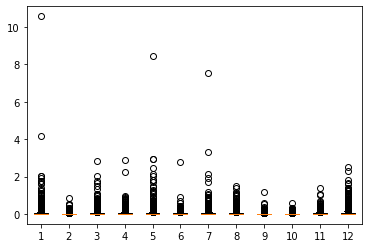

In [52]:
Other_sales_dic = {}
tmp = 0
plot_data = []
for i in game_genre : Other_sales_dic[tmp] = df.query(f'Genre == "{i}"').Other_Sales; tmp +=1
for i in range (len(Other_sales_dic)) : plot_data.append(Other_sales_dic[i])
ax = plt.boxplot(plot_data)
plt.show()

In [53]:
aov = pg.anova(data=df, dv='Other_Sales', between='Genre', detailed=True)
print(aov)

   Source          SS     DF        MS          F         p-unc       np2
0   Genre    4.952645     11  0.450240  12.671023  2.813797e-24  0.008395
1  Within  584.981049  16463  0.035533        NaN           NaN       NaN


In [54]:
pd.options.display.max_rows = None
pt = pg.pairwise_gameshowell(data=df, dv='Other_Sales', between='Genre') # gameshowell 다중비교 실행, 결과는 Shooter > Racing  > Platform > Sports > Action ... 순
pt

A             B   mean(A)   mean(B)      diff        se  \
0         Action     Adventure  0.056760  0.013114  0.043646  0.004382   
1         Action      Fighting  0.056760  0.043092  0.013668  0.005548   
2         Action          Misc  0.056760  0.044855  0.011905  0.005515   
3         Action      Platform  0.056760  0.058744 -0.001984  0.007033   
4         Action        Puzzle  0.056760  0.021874  0.034886  0.005155   
5         Action        Racing  0.056760  0.062470 -0.005710  0.008820   
6         Action  Role-Playing  0.056760  0.038606  0.018154  0.005176   
7         Action       Shooter  0.056760  0.078976 -0.022216  0.006964   
8         Action    Simulation  0.056760  0.036702  0.020058  0.005821   
9         Action        Sports  0.056760  0.057670 -0.000910  0.006574   
10        Action      Strategy  0.056760  0.016741  0.040019  0.004490   
11     Adventure      Fighting  0.013114  0.043092 -0.029978  0.003838   
12     Adventure          Misc  0.013114  0.044855 -0.031741  0.003790   
13     Adventure      Platform  0.013114  0.058744 -0.045631  0.005781   
14     Adventure        Puzzle  0.013114  0.021874 -0.008760  0.003245   
15     Adventure        Racing  0.013114  0.062470 -0.049356  0.007858   
16     Adventure  Role-Playing  0.013114  0.038606 -0.025493  0.003277   
17     Adventure       Shooter  0.013114  0.078976 -0.065862  0.005696   
18     Adventure    Simulation  0.013114  0.036702 -0.023588  0.004223   
19     Adventure        Sports  0.013114  0.057670 -0.044557  0.005212   
20     Adventure      Strategy  0.013114  0.016741 -0.003627  0.002027   
21      Fighting          Misc  0.043092  0.044855 -0.001763  0.005093   
22      Fighting      Platform  0.043092  0.058744 -0.015653  0.006708   
23      Fighting        Puzzle  0.043092  0.021874  0.021218  0.004702   
24      Fighting        Racing  0.043092  0.062470 -0.019378  0.008563   
25      Fighting  Role-Playing  0.043092  0.038606  0.004485  0.004724   
26      Fighting       Shooter  0.043092  0.078976 -0.035885  0.006635   
27      Fighting    Simulation  0.043092  0.036702  0.006390  0.005424   
28      Fighting        Sports  0.043092  0.057670 -0.014579  0.006225   
29      Fighting      Strategy  0.043092  0.016741  0.026351  0.003961   
30          Misc      Platform  0.044855  0.058744 -0.013890  0.006680   
31          Misc        Puzzle  0.044855  0.021874  0.022981  0.004662   
32          Misc        Racing  0.044855  0.062470 -0.017615  0.008542   
33          Misc  Role-Playing  0.044855  0.038606  0.006248  0.004685   
34          Misc       Shooter  0.044855  0.078976 -0.034121  0.006607   
35          Misc    Simulation  0.044855  0.036702  0.008153  0.005389   
36          Misc        Sports  0.044855  0.057670 -0.012816  0.006195   
37          Misc      Strategy  0.044855  0.016741  0.028114  0.003914   
38      Platform        Puzzle  0.058744  0.021874  0.036870  0.006387   
39      Platform        Racing  0.058744  0.062470 -0.003725  0.009592   
40      Platform  Role-Playing  0.058744  0.038606  0.020138  0.006404   
41      Platform       Shooter  0.058744  0.078976 -0.020232  0.007919   
42      Platform    Simulation  0.058744  0.036702  0.022043  0.006935   
43      Platform        Sports  0.058744  0.057670  0.001074  0.007578   
44      Platform      Strategy  0.058744  0.016741  0.042004  0.005863   
45        Puzzle        Racing  0.021874  0.062470 -0.040596  0.008314   
46        Puzzle  Role-Playing  0.021874  0.038606 -0.016732  0.004256   
47        Puzzle       Shooter  0.021874  0.078976 -0.057102  0.006310   
48        Puzzle    Simulation  0.021874  0.036702 -0.014828  0.005021   
49        Puzzle        Sports  0.021874  0.057670 -0.035796  0.005877   
50        Puzzle      Strategy  0.021874  0.016741  0.005133  0.003389   
51        Racing  Role-Playing  0.062470  0.038606  0.023863  0.008327   
52        Racing       Shooter  0.062470  0.078976 -0.016506  0.009542   
53        Racing   

In [55]:
pt['AB_dif'] = pt['mean(A)']/pt['mean(B)']
pt['BA_dif'] = pt['mean(B)']/pt['mean(A)']
n = len(pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)])
a = pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)& (pt['BA_dif']>1)]['BA_dif'].sum()
b = pt[((pt['A']=='Shooter') | (pt['B']=='Shooter'))& (pt['pval']<=0.05)& (pt['AB_dif']>1)]['AB_dif'].sum()
print((a+b)/n)

3.163070697915536


In [56]:
# 즉, 미국 지역에서는 슈터, 스포츠 유럽지역에서는 슈터 레이싱, 일본지역에서는 RPG, FIgthing, 
# 그외 지역에서는 슈터, 레이싱이 인기가 많은것으로 보임, 플랫폼의 경우 전지역에서 인기가 많은 장르로 나타남.
# 베스트 셀러인 슈퍼마리오 시리즈가 영향이 큰 것으로 보임.

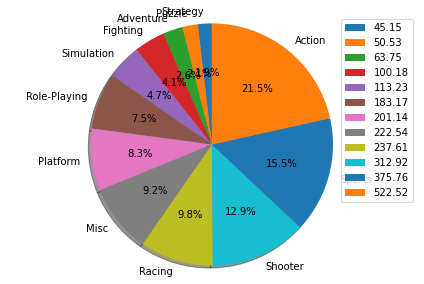

In [57]:
data = df.groupby("Genre")["EU_Sales"].sum()
sizes = data.value_counts().sort_index() / data.value_counts().sum() * 100
plt.pie(data.sort_values(), labels=data.sort_values().index,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(sizes.index, loc="best")
plt.tight_layout()
plt.show()

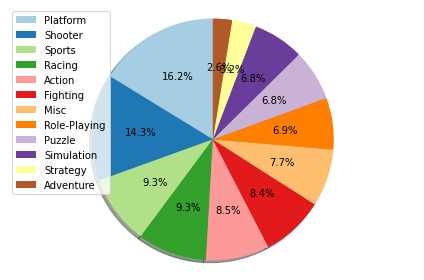

In [58]:
data = df.groupby("Genre")["NA_Sales"].mean().sort_values(ascending=False)
sns.set_palette("Paired")
plt.pie(data,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(data.index, loc="best")
plt.tight_layout()
plt.show()

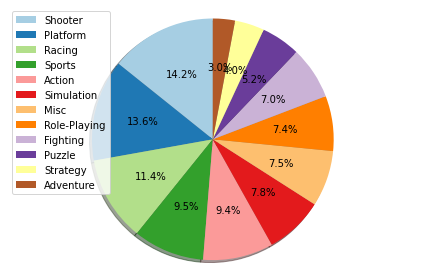

In [59]:
data = df.groupby("Genre")["EU_Sales"].mean().sort_values(ascending=False)
sns.set_palette("Paired")
plt.pie(data,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(data.index, loc="best")
plt.tight_layout()
plt.show()

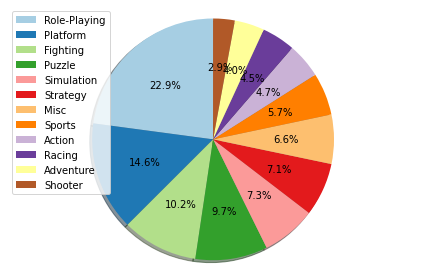

In [60]:
data = df.groupby("Genre")["JP_Sales"].mean().sort_values(ascending=False)
plt.pie(data,
        autopct='%1.1f%%', shadow=True, startangle=90, normalize=True)
plt.axis('equal')
plt.legend(data.index, loc="best")
plt.tight_layout()
plt.show()

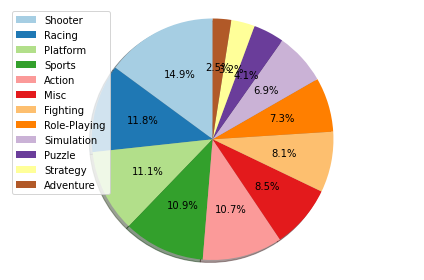

In [61]:
data = df.groupby("Genre")["Other_Sales"].mean().sort_values(ascending=False)
plt.pie(data,
        autopct='%1.1f%%', shadow=True, startangle=90, normalize=True)
plt.axis('equal')
plt.legend(data.index, loc="best")
plt.tight_layout()
plt.show()

In [62]:
df_80th = df.query('Year < 1990')

In [63]:
df_90th = df.query('1990 <= Year < 2000')

In [64]:
df_00th = df.query('2000 <= Year < 2010')

In [65]:
df_10th = df.query('2000 <= Year < 2017')

In [66]:
th_name = [df_80th,df_90th,df_00th,df_10th]
for i in th_name : 
    for j in name:
        aov = pg.anova(data=i, dv=j, between='Genre', detailed=True) ; print(aov.loc[:0])

  Source          SS  DF         MS         F     p-unc       np2
0  Genre  126.484187  10  12.648419  1.137868  0.335811  0.054869
  Source        SS  DF        MS         F     p-unc      np2
0  Genre  3.491443  10  0.349144  1.875209  0.050587  0.08732
  Source         SS  DF        MS         F     p-unc       np2
0  Genre  32.318705  10  3.231871  4.688861  0.000005  0.193046
  Source        SS  DF        MS         F     p-unc      np2
0  Genre  0.274166  10  0.027417  1.538693  0.128042  0.07279
  Source         SS  DF      MS         F         p-unc       np2
0  Genre  57.260502  11  5.2055  8.182961  4.091797e-14  0.048708
  Source         SS  DF       MS        F         p-unc      np2
0  Genre  10.870315  11  0.98821  4.82056  2.330938e-07  0.02928
  Source         SS  DF        MS          F         p-unc       np2
0  Genre  33.373772  11  3.033979  12.866534  8.500371e-24  0.074509
  Source        SS  DF        MS         F         p-unc       np2
0  Genre  0.255169  11  0

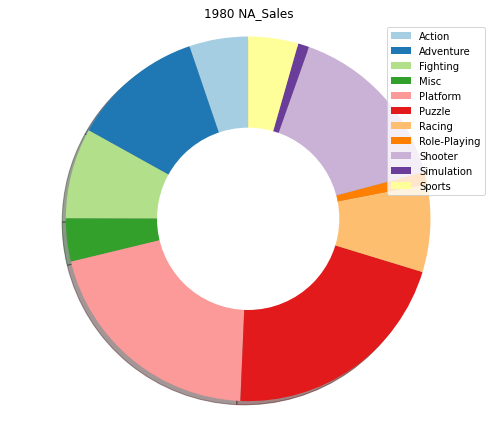

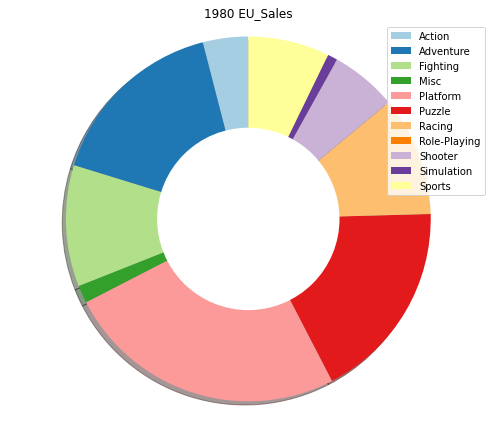

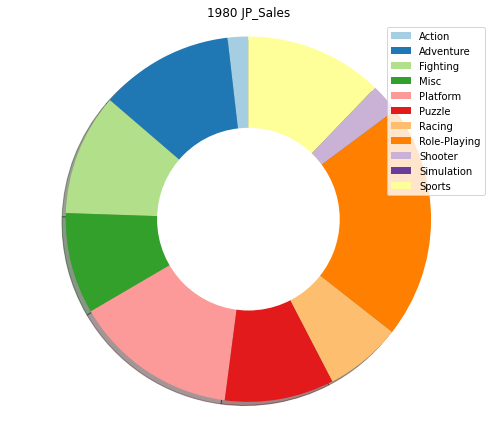

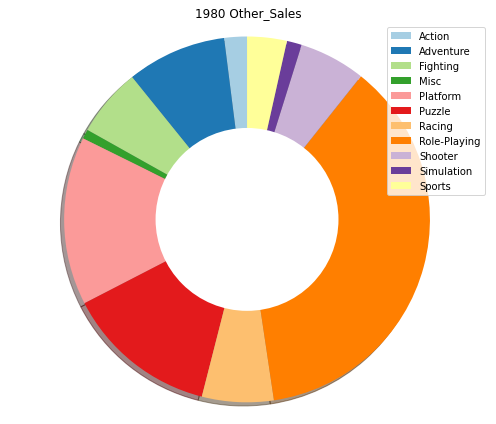

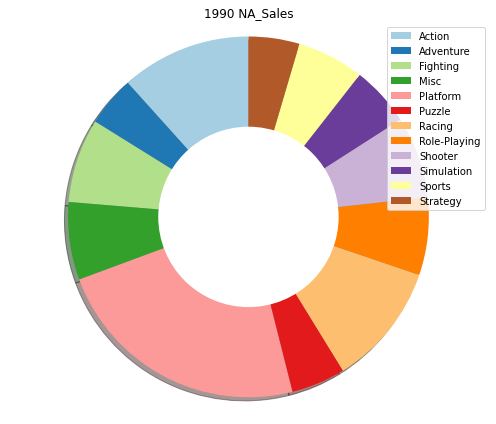

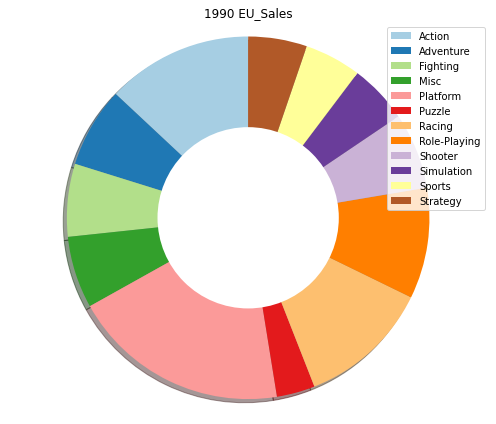

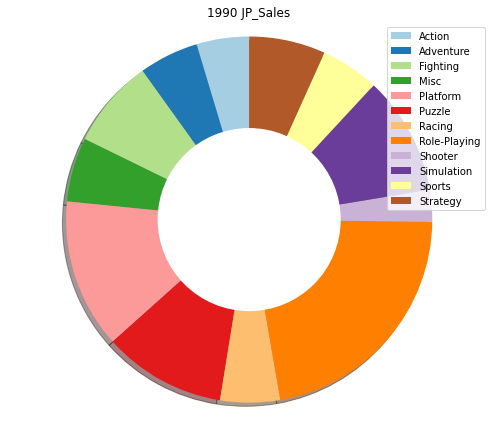

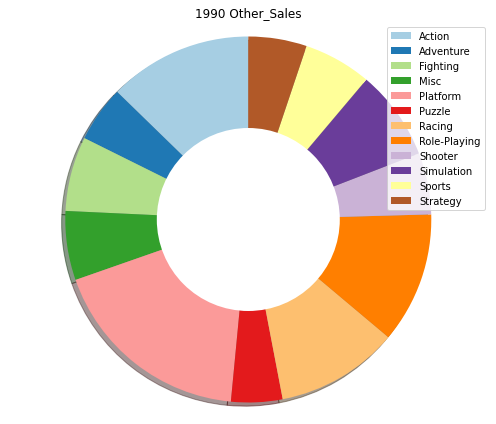

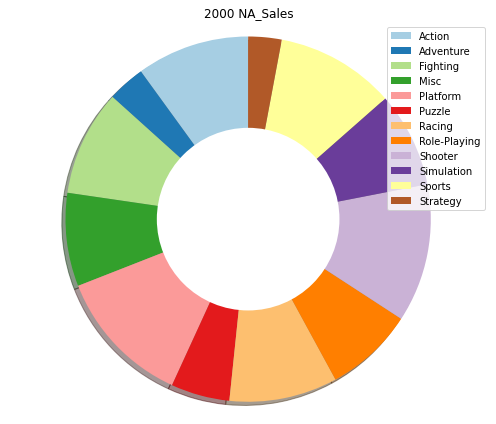

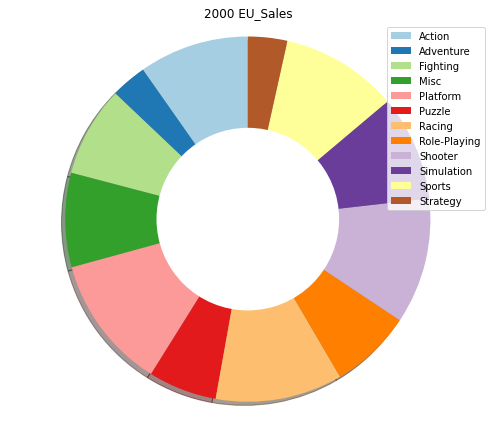

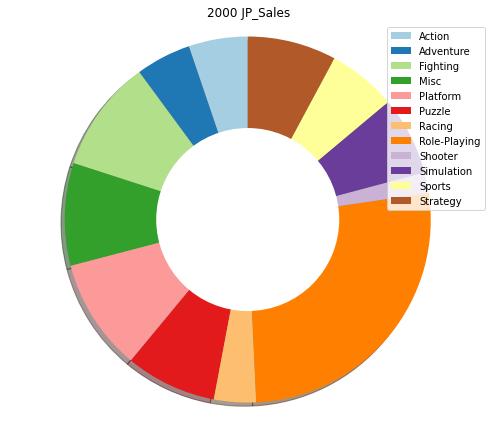

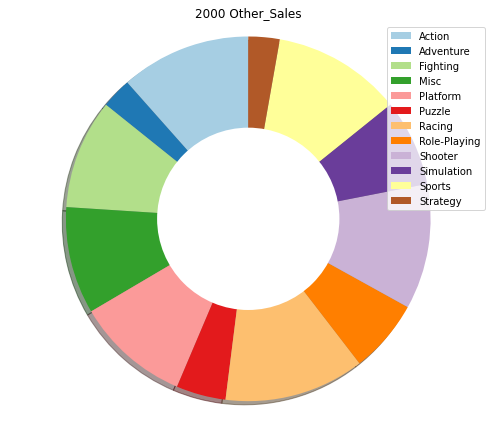

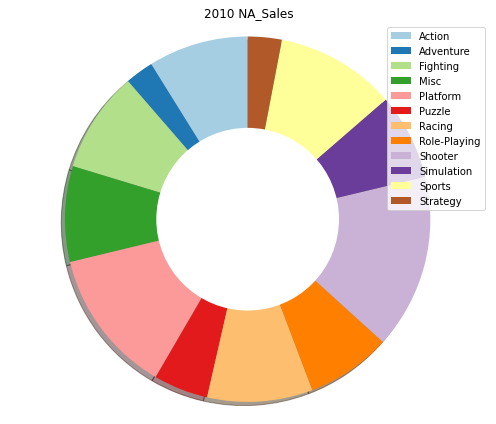

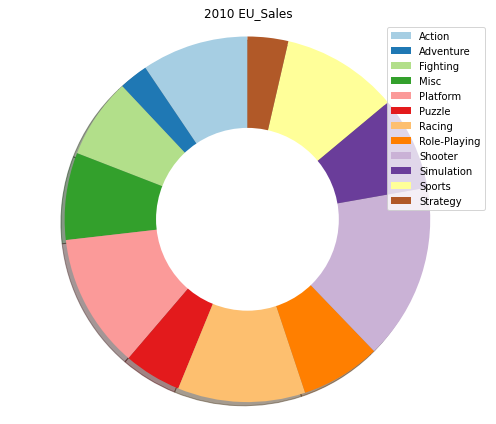

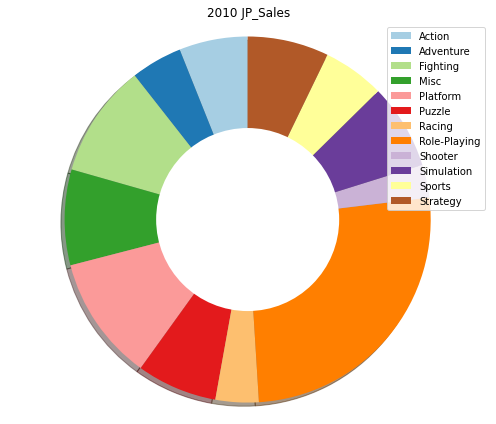

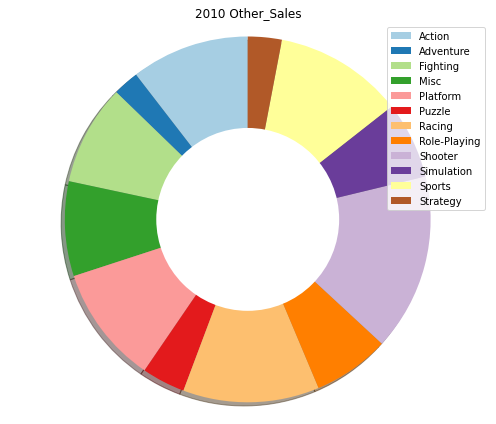

In [68]:
year = 1970
for i in th_name : 
    year += 10
    for j in name:
        plt.figure(figsize=(7, 6), tight_layout=True)
        data = i.groupby("Genre")[j].mean()
        plt.pie(data, shadow=True, startangle=90, normalize=True, pctdistance=.7)
        centre_circle = plt.Circle((0,0),0.50,fc='white')
        plt.legend(data.index,loc='upper right')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal')
        plt.title(f"{year} {j}")
        plt.tight_layout()
        plt.savefig(f'{year}_{j}.png', transparent = True)
        plt.show()

In [69]:
data

Genre
Action          0.058695
Adventure       0.012857
Fighting        0.049845
Misc            0.046939
Platform        0.058565
Puzzle          0.021435
Racing          0.067581
Role-Playing    0.038022
Shooter         0.087836
Simulation      0.038218
Sports          0.063977
Strategy        0.016830
Name: Other_Sales, dtype: float64

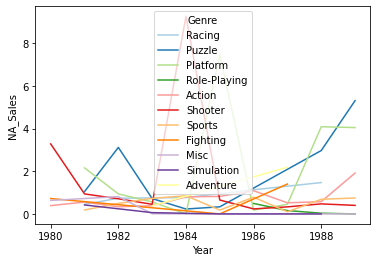

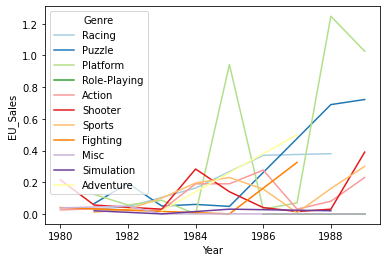

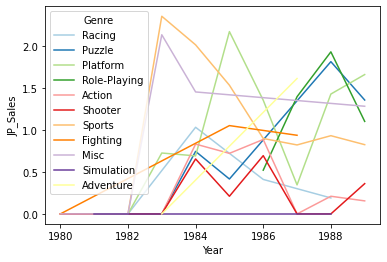

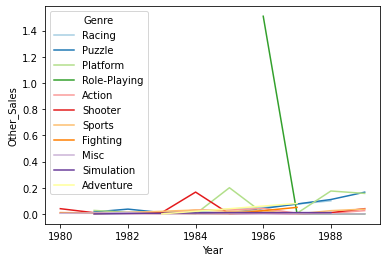

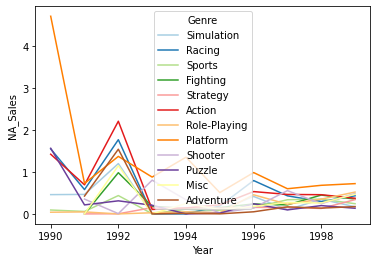

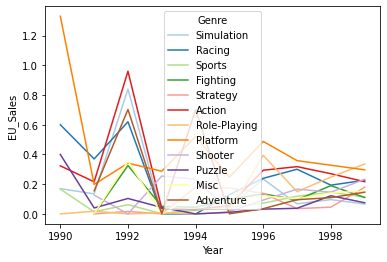

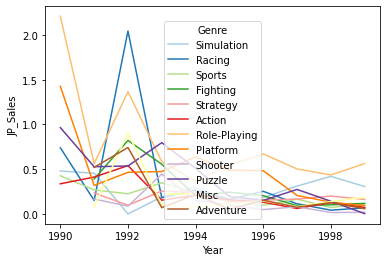

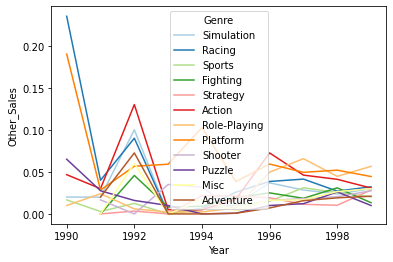

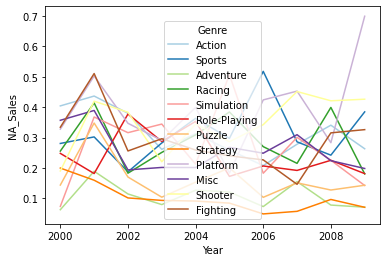

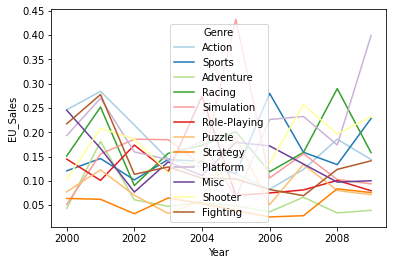

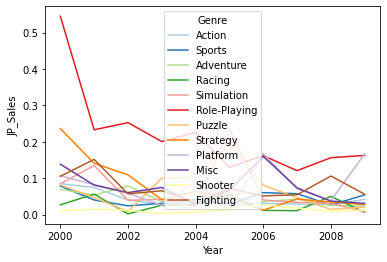

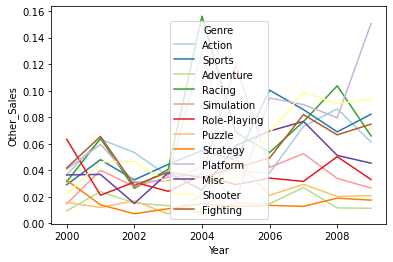

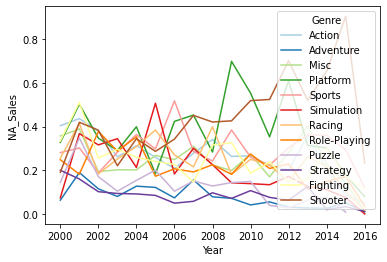

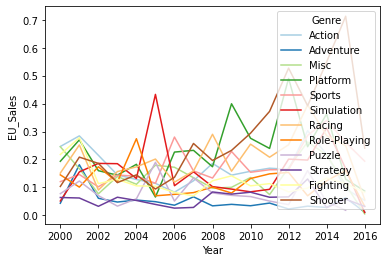

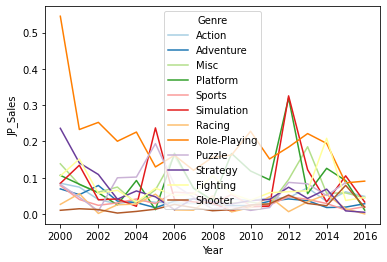

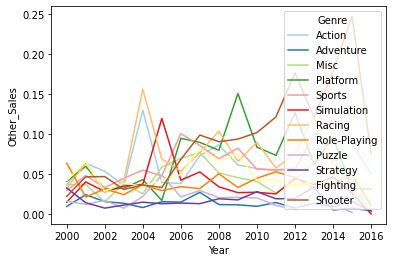

In [70]:
for i in th_name:
    for j in name : 
        sns.lineplot(x='Year',y=j,hue="Genre",data=i,ci=None); plt.show()

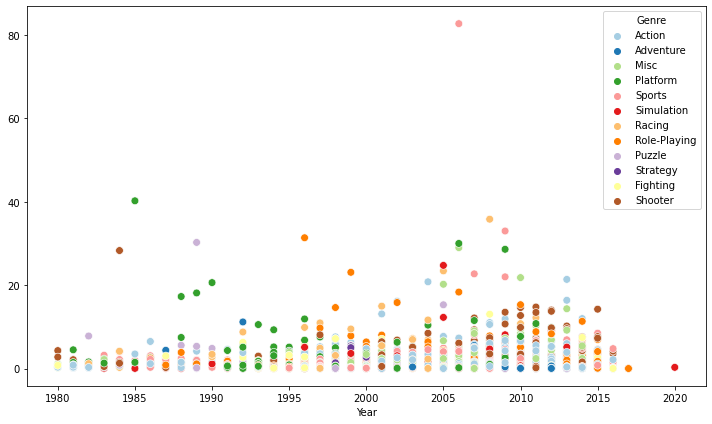

In [71]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='Year', y=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'],   hue='Genre', palette='Paired', s=60)
plt.savefig('myfigure.png', transparent = True)

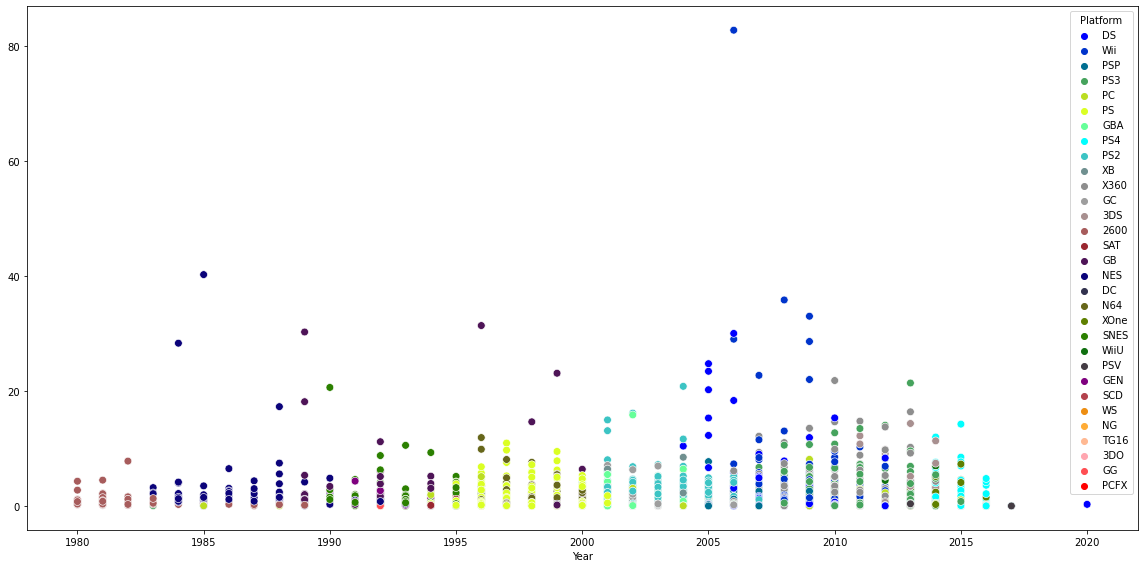

In [72]:
plt.figure(figsize=(16,8), tight_layout=True)
palette = sns.blend_palette(['blue','teal','yellow','cyan','gray','darkgray','brown','navy','olive','green','purple','orange','pink','red'], len(df.Platform.unique()))
ax = sns.scatterplot(data=df, x='Year', y=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'], palette = palette,hue='Platform', s=60)
plt.savefig('platform.png', transparent = True)

In [73]:
import pingouin as pg
pg.multivariate_ttest(df_80th.iloc[:,5:], df_90th.iloc[:,5:]) # 년대 별 집단의 평균 차이가 있는지 hottelings T2 검정

T2          F  df1   df2          pval
hotelling  172.90652  43.160969    4  1972  9.270644e-35

In [74]:
pg.multivariate_ttest(df_80th.iloc[:,5:], df_00th.iloc[:,5:])

T2           F  df1   df2           pval
hotelling  946.29692  236.499577    4  9504  6.393294e-194

In [75]:
pg.multivariate_ttest(df_80th.iloc[:,5:], df_10th.iloc[:,5:])

T2          F  df1    df2           pval
hotelling  1125.638858  281.35228    4  14696  1.757627e-233

In [76]:
pg.multivariate_ttest(df_90th.iloc[:,5:], df_00th.iloc[:,5:])

T2           F  df1    df2           pval
hotelling  521.872052  130.432656    4  11067  4.956575e-109

In [77]:
pg.multivariate_ttest(df_90th.iloc[:,5:], df_10th.iloc[:,5:])

T2           F  df1    df2           pval
hotelling  644.107514  160.997172    4  16259  2.240772e-135

In [78]:
pg.multivariate_ttest(df_00th.iloc[:,5:], df_10th.iloc[:,5:])

T2         F  df1    df2      pval
hotelling  31.959954  7.988981    4  23791  0.000002

In [79]:
#모든 세대별 집단의 평균 차이가 유의하다.

In [80]:
pg.multivariate_ttest(df_80th.query(f"Genre == 'Platform'").iloc[:,5:], df_80th.query(f"Genre != 'Platform'").iloc[:,5:]) 
# 80년대 집단이 플랫폼인 경우와 아닌 경우를 비교하였을 때 분명한 차이가 있다.

T2         F  df1  df2      pval
hotelling  16.695507  4.112796    4  202  0.003166

In [81]:
pg.multivariate_ttest(df_90th.query(f"Genre == 'Platform'").iloc[:,5:], df_90th.query(f"Genre != 'Platform'").iloc[:,5:]) 
# 90년도 또한 평균차이가 유의

T2          F  df1   df2          pval
hotelling  78.90449  19.692651    4  1765  7.138715e-16

In [82]:
print(pg.multivariate_ttest(df_00th.query(f"Genre == 'Racing'").iloc[:,5:], df_00th.query(f"Genre != 'Racing'").iloc[:,5:]))
print(pg.multivariate_ttest(df_00th.query(f"Genre == 'Action'").iloc[:,5:], df_00th.query(f"Genre != 'Action'").iloc[:,5:]))
#00년대의 레이싱, 액션의 경우도 평균차이가 유의.

                  T2         F  df1   df2          pval
hotelling  38.693319  9.670209    4  9297  8.406851e-08
                  T2         F  df1   df2      pval
hotelling  27.846973  6.959498    4  9297  0.000014


In [83]:
pg.multivariate_ttest(df_10th.query(f"Genre == 'Shooter'").iloc[:,5:], df_10th.query(f"Genre != 'Shooter'").iloc[:,5:]) 
#10년도의 슈터 장르의 평균 차이도 확실히 유의함.

T2          F  df1    df2          pval
hotelling  186.961371  46.730667    4  14489  4.361127e-39

In [84]:
pg.multivariate_ttest(df_10th.query(f"Platform == 'PS3'").iloc[:,5:], df_10th.query(f"Platform != 'PS3'").iloc[:,5:])

T2          F  df1    df2          pval
hotelling  236.853196  59.201041    4  14489  1.159698e-49

In [85]:
# 분산분석 결과, 1980년대를 제외한 모든 년대에서 장르별 평균의 차이가 유의함을 알 수 있음.
# 년대를 감안한 라인그래프, 파이차트를 그려보았을때 차이를 확인할 수 있었음
# 일본의 경우 RPG가 꾸준한 강세를 보였으며, 2010년대로 접어들 수록 fighting 장르의 인기가 높아짐을 알 수 있음
# 일본을 제외한 지역에서는 과거엔 플랫폼이 강세를 보였으나, 현재로 접어들 수록 shooting 장릐의 인기가 강세를 보이는 것으로 보임
# Platform 장르는 시기와 지역을 구분하지 않고 인기가 많은 장르인것으로 보임
# 또한 기간별, 게임 플랫폼 별로 유의한 차이가 있음을 알 수 있으며 시간이 지날수록 최신기종으로 세대교체가 이루어짐을 볼 수 있음.
# 세대교체는 약 10년 주기로 일어나는것으로 보임

In [97]:
best_seller = pd.DataFrame()
for j in [1980,1990,2000,2010] : 
    for i in name :
        tmp_df = df.query(f'({i} >= 0.1)and ({j}<= Year < {j+10})')
        for k,l,m,n,o,p in tmp_df.loc[:,["Name","Genre",'Platform','Publisher',"Year",i]].itertuples(index=False):
            tmp = pd.DataFrame({"지역" : [i[:2]] ,"세대" : [j] ,"게임이름" : [k], "장르":[l],'플랫폼':[m],'유통사':[n],"출시년도" : [o],"판매량":[p]})
            best_seller = best_seller.append(tmp)

In [98]:
best_seller.query("게임이름=='Super Mario Bros.'")

지역    세대               게임이름        장르  플랫폼       유통사    출시년도    판매량
0  NA  1980  Super Mario Bros.  Platform  NES  Nintendo  1985.0  29.08
0  EU  1980  Super Mario Bros.  Platform  NES  Nintendo  1985.0   3.58
0  JP  1980  Super Mario Bros.  Platform  NES  Nintendo  1985.0   6.81
0  Ot  1980  Super Mario Bros.  Platform  NES  Nintendo  1985.0   0.77
0  NA  1990  Super Mario Bros.  Platform   GB  Nintendo  1999.0   3.40
0  EU  1990  Super Mario Bros.  Platform   GB  Nintendo  1999.0   1.30
0  JP  1990  Super Mario Bros.  Platform   GB  Nintendo  1999.0   0.15
0  Ot  1990  Super Mario Bros.  Platform   GB  Nintendo  1999.0   0.22

In [99]:
game_name = {}
a = 0
for i in best_seller.지역.unique():
    for j in best_seller.세대.unique():
        game_name[a] = best_seller.query(f'(지역 == "{i}") and(세대 == {j})').sort_values(by=['판매량'],ascending=False,axis=0).게임이름.head(10)
        game_name[a] = game_name[a].drop_duplicates()
        a+=1

In [100]:
import platform
%matplotlib inline


path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unkown system... sorry~~~~')
    
plt.rcParams['axes.unicode_minus']=False

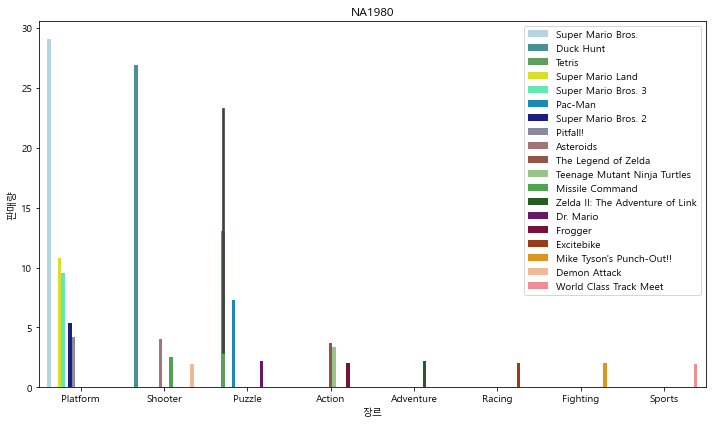

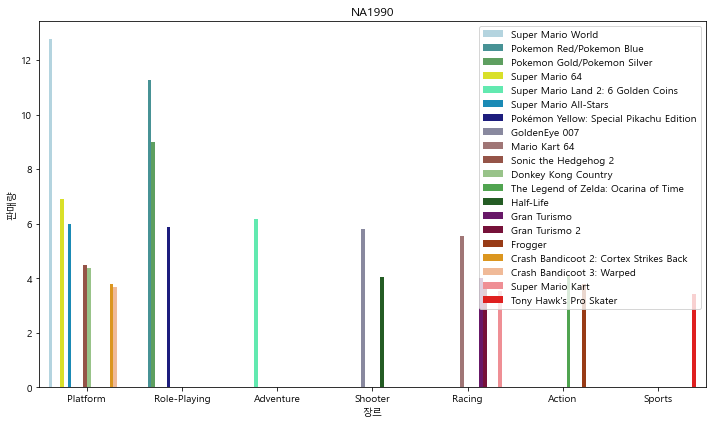

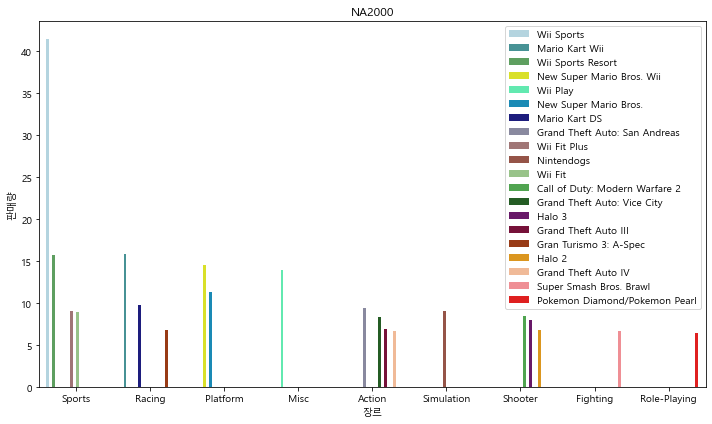

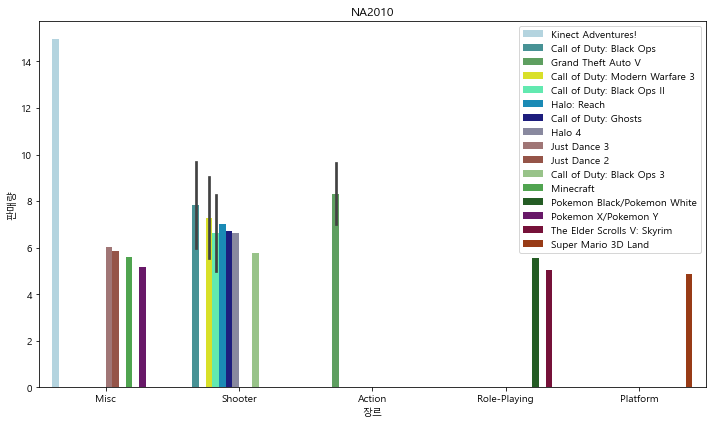

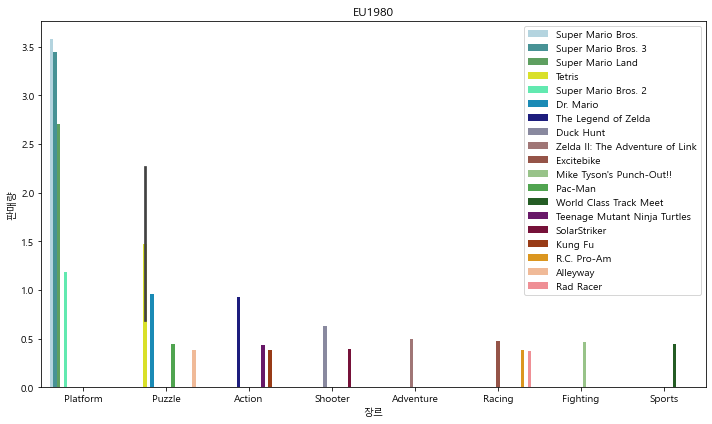

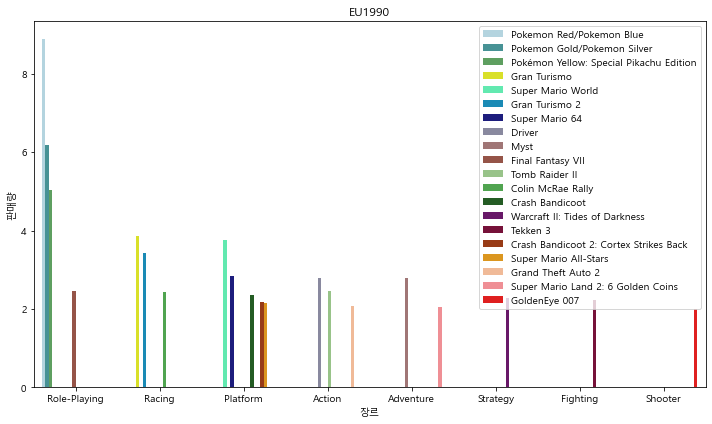

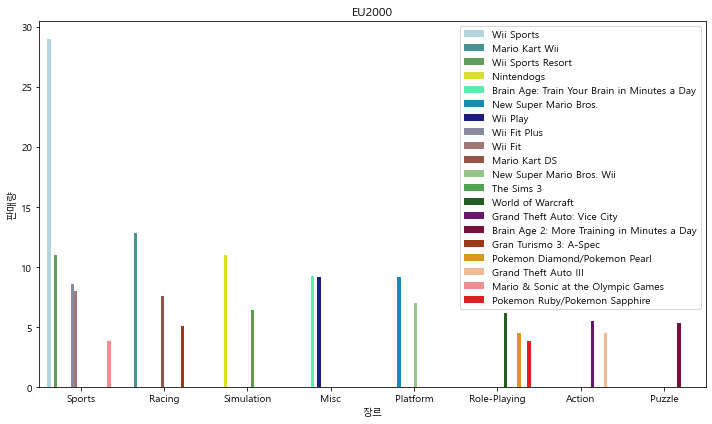

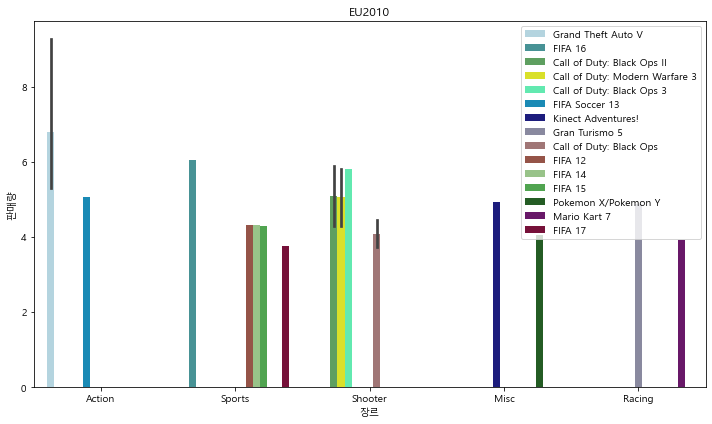

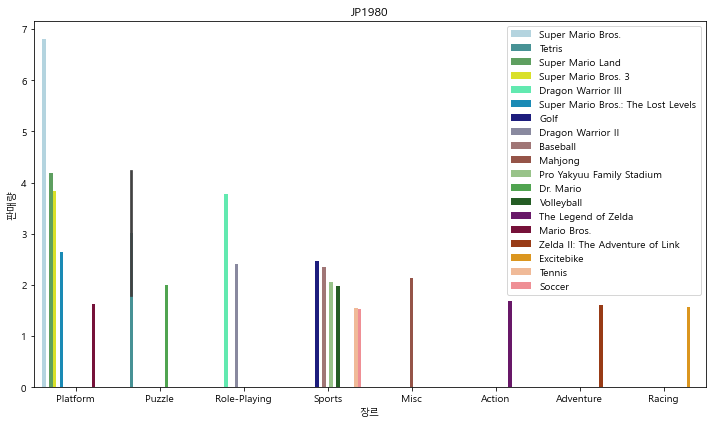

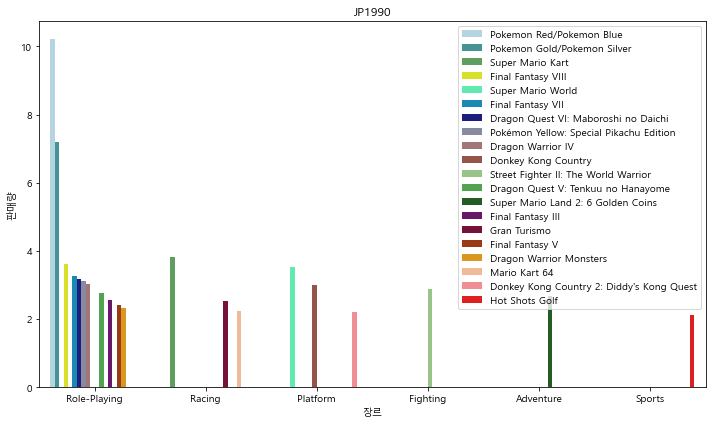

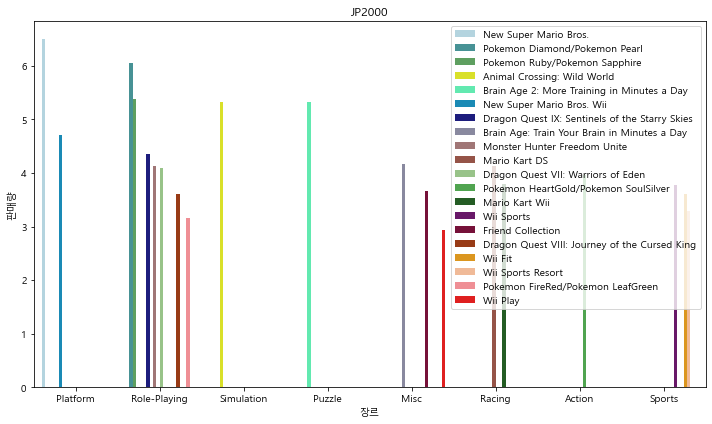

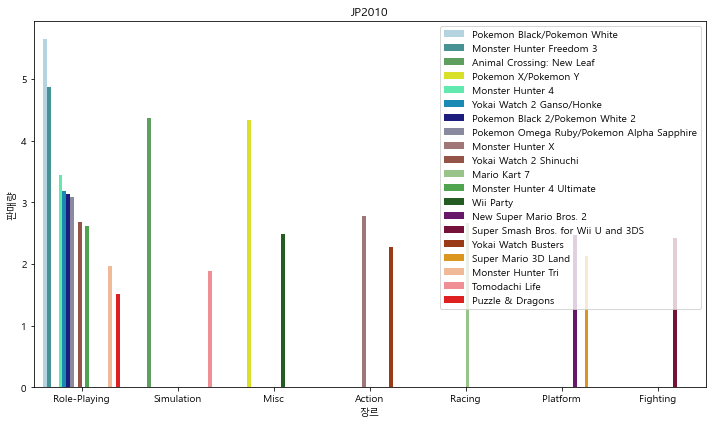

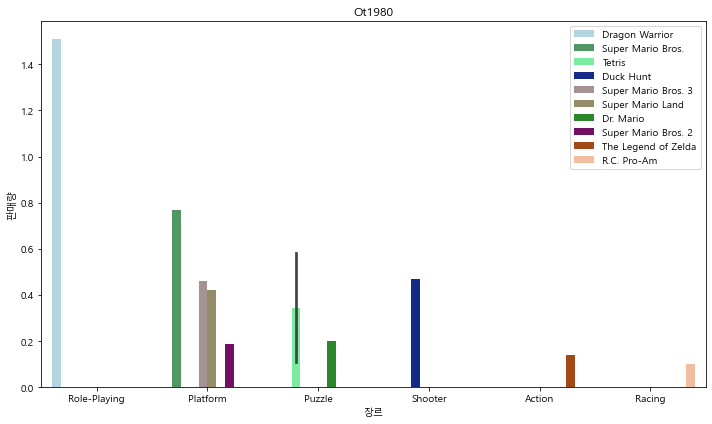

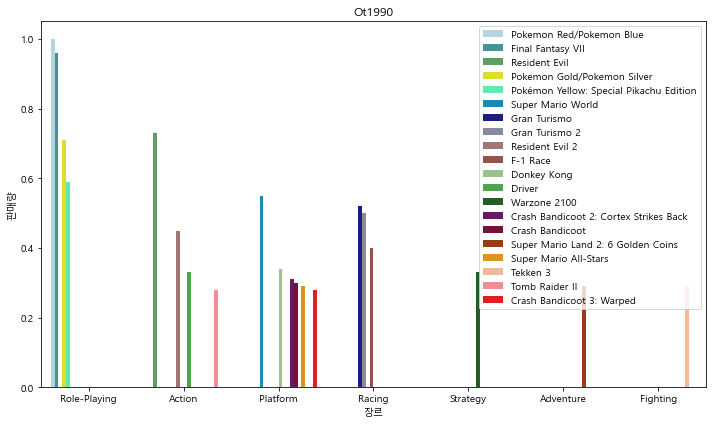

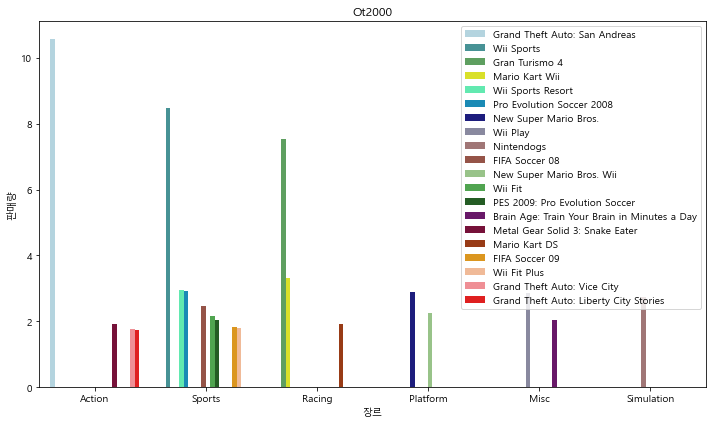

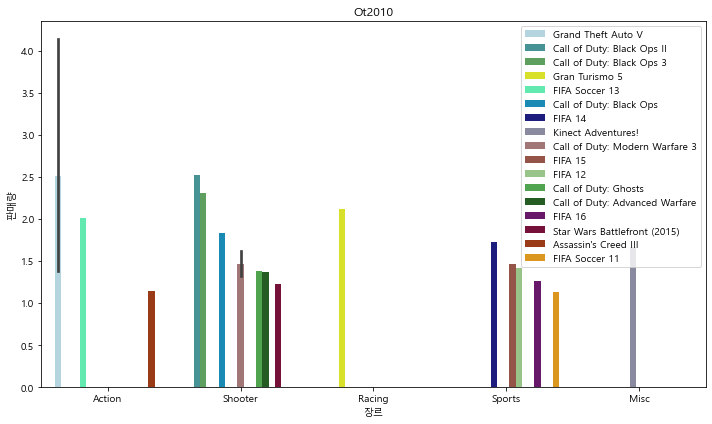

In [101]:
for i in best_seller.지역.unique():
    for j in best_seller.세대.unique():
        plt.figure(figsize=(10, 6), tight_layout=True)
        tmp = best_seller.query(f'(지역 == "{i}") and(세대 == {j})').sort_values(by=['판매량'],ascending=False,axis=0).head(20)
        palette = sns.blend_palette(['lightblue','teal','yellow','cyan','darkblue','darkgray','brown','lightgreen','green','purple','darkred','orange','pink','red'], len(tmp))
        sns.barplot(data = tmp, y='판매량',x='장르',hue='게임이름',palette=palette)
        plt.title(f'{i}{j}')
        plt.legend(loc='upper right')
        plt.savefig(f'장르별{i}{j}.png', transparent = True)
        plt.show()

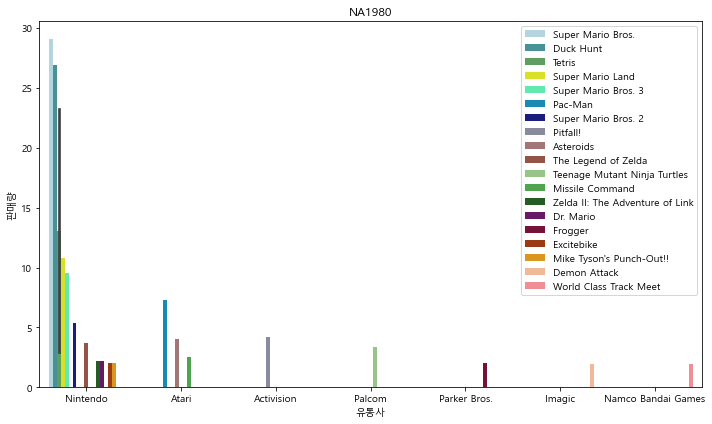

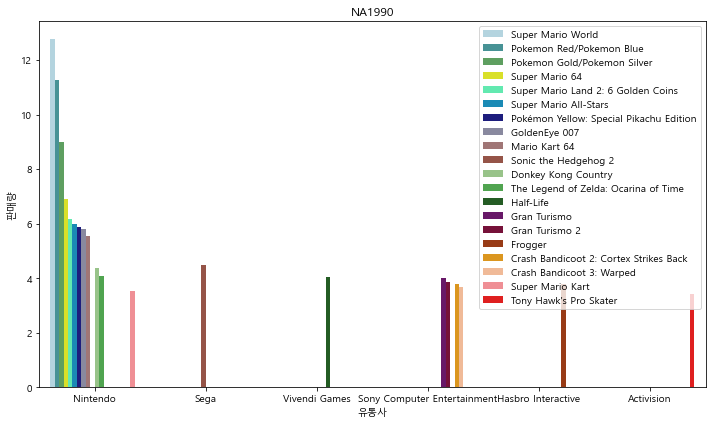

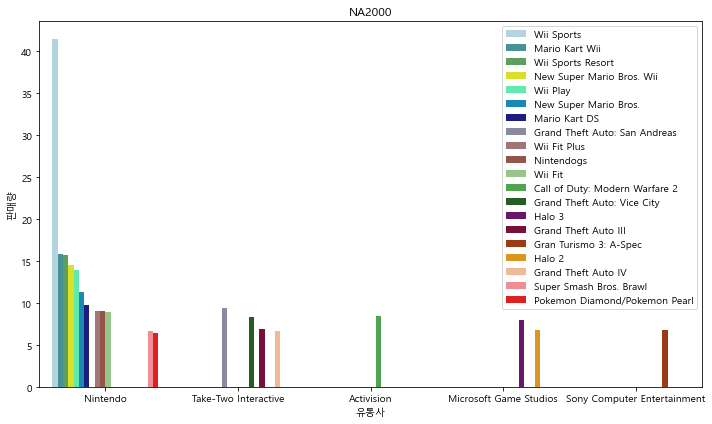

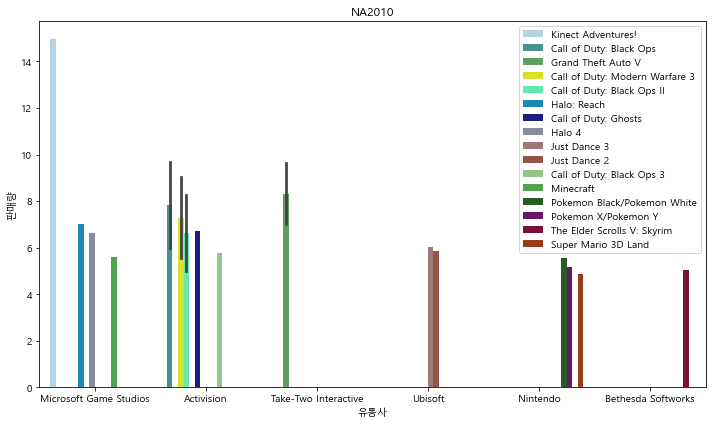

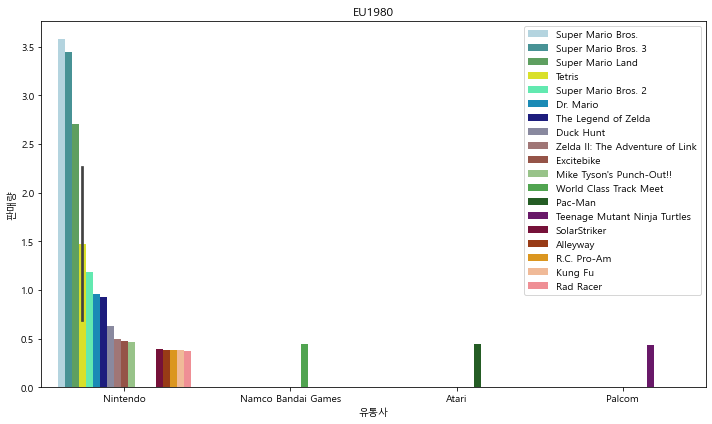

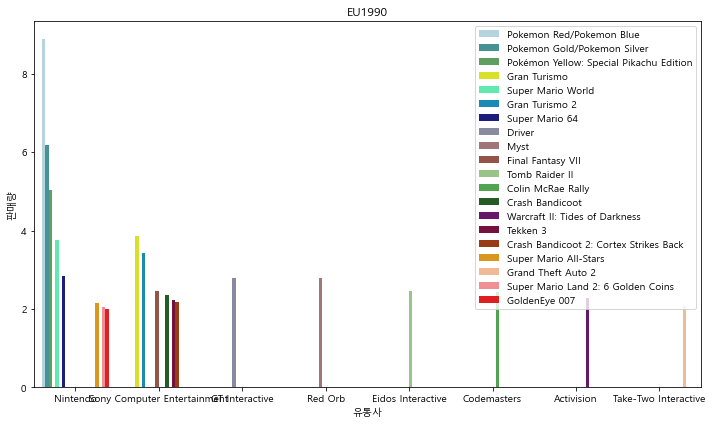

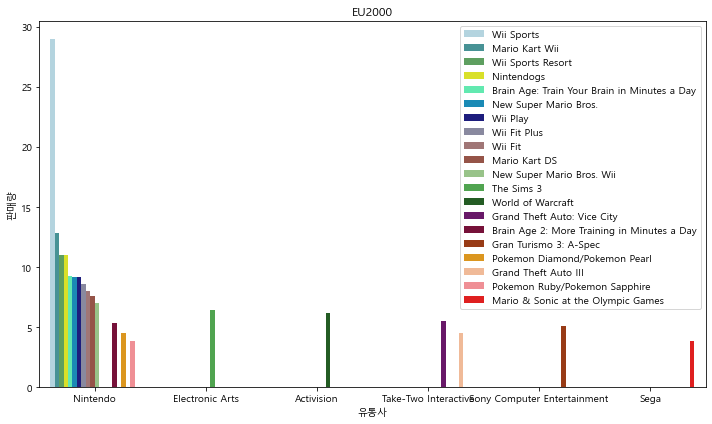

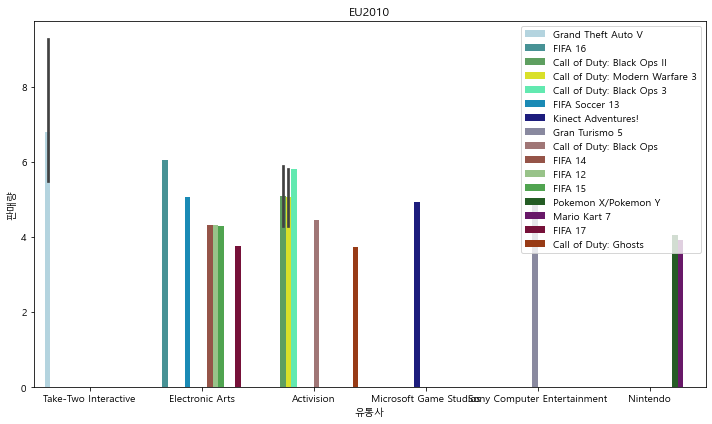

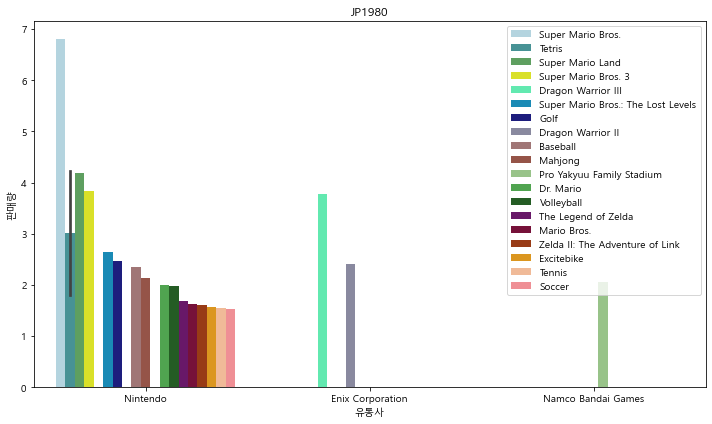

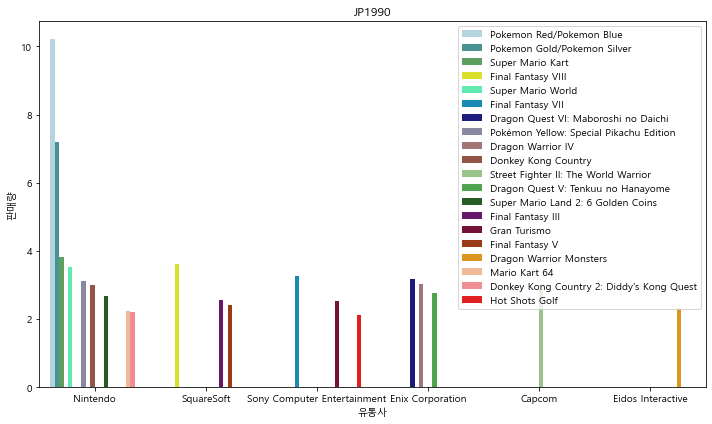

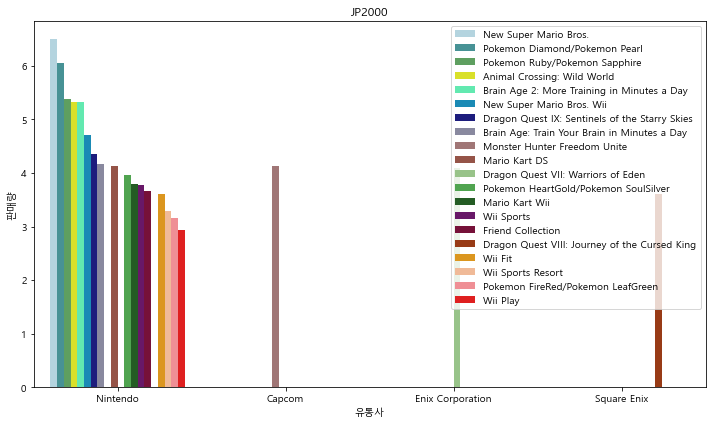

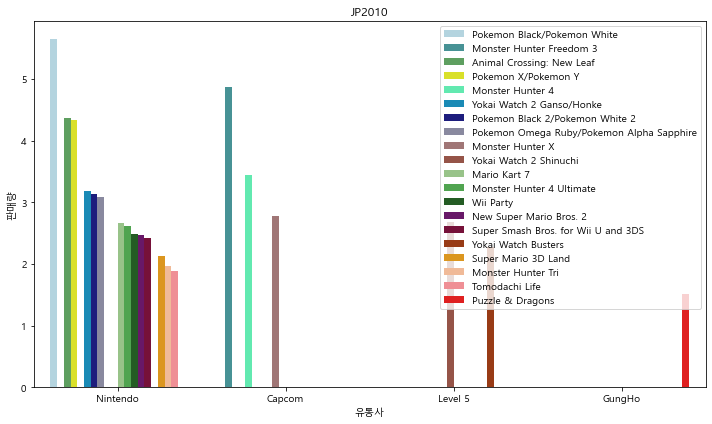

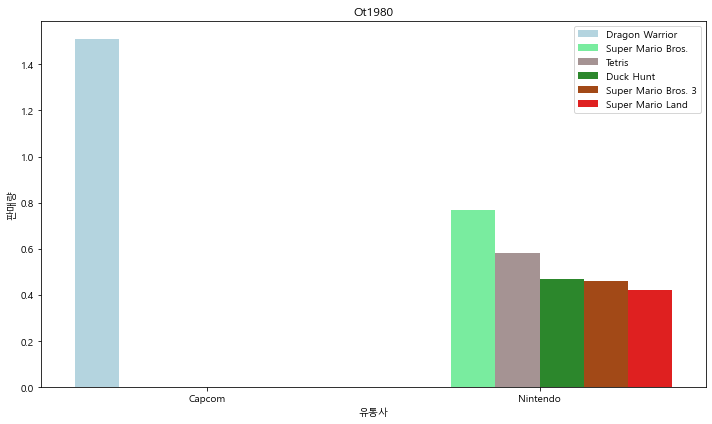

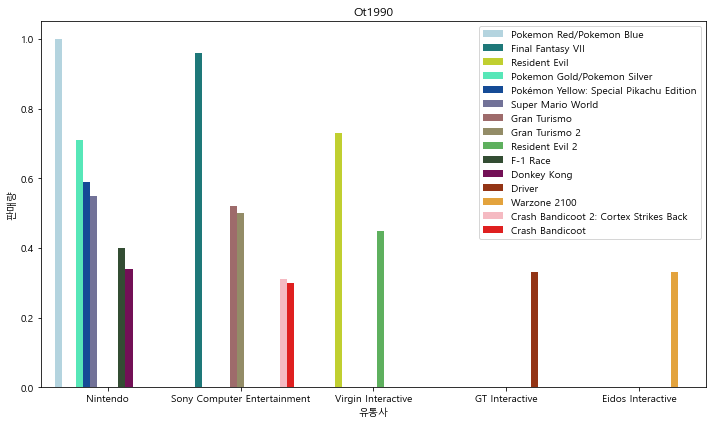

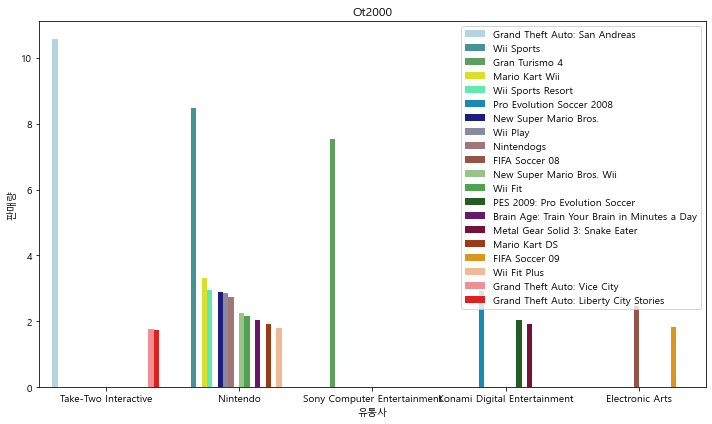

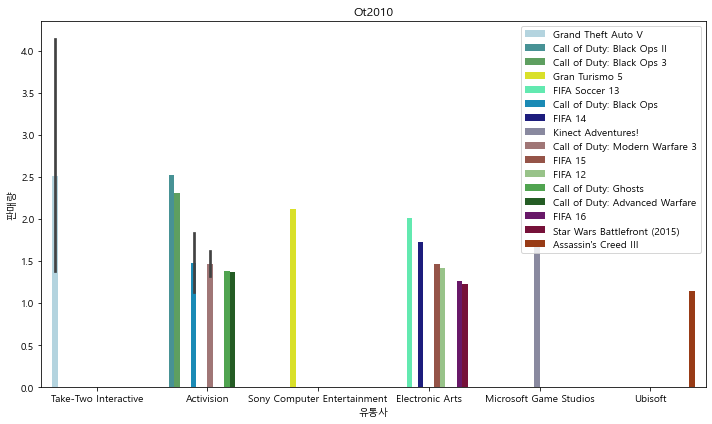

In [91]:
for i in best_seller.지역.unique():
    for j in best_seller.세대.unique():
        plt.figure(figsize=(10, 6), tight_layout=True)
        tmp = best_seller.query(f'(지역 == "{i}") and(세대 == {j})').sort_values(by=['판매량'],ascending=False,axis=0).head(20)
        palette = sns.blend_palette(['lightblue','teal','yellow','cyan','darkblue','darkgray','brown','lightgreen','green','purple','darkred','orange','pink','red'], len(tmp))
        sns.barplot(data = tmp, y='판매량',x='유통사',hue='게임이름',palette=palette)
        plt.title(f'{i}{j}')
        plt.legend(loc='upper right')
        plt.savefig(f'유통사{i}{j}.png', transparent = True)
        plt.show()

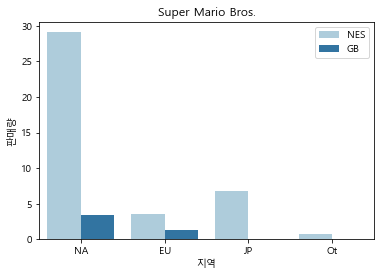

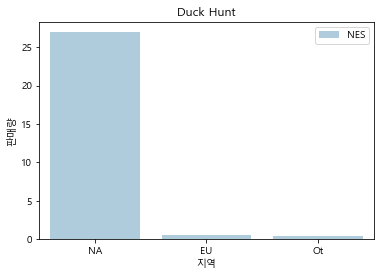

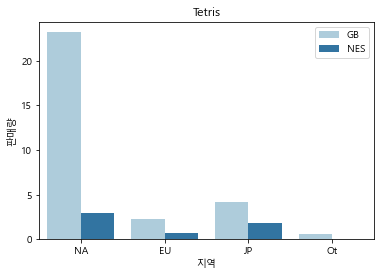

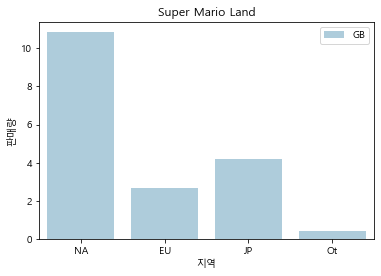

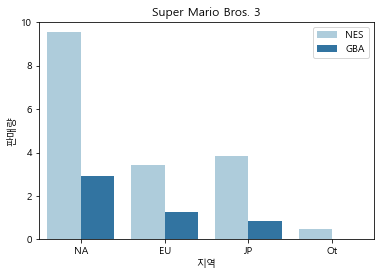

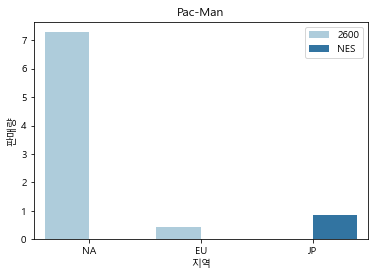

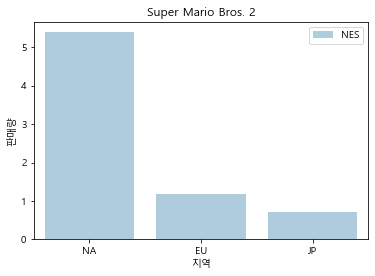

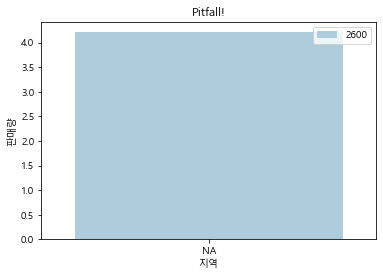

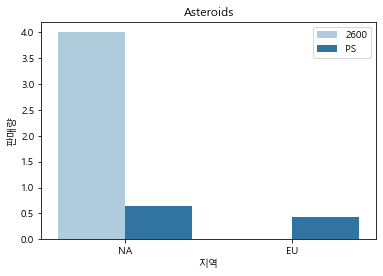

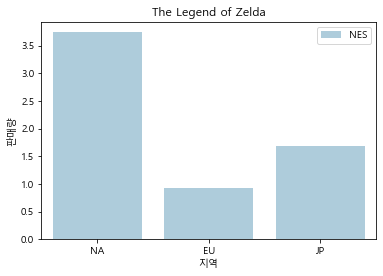

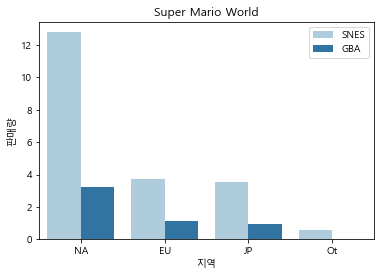

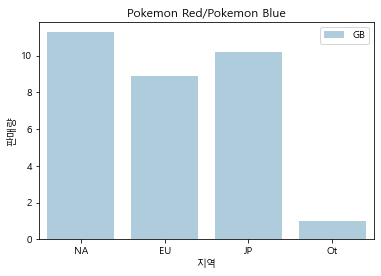

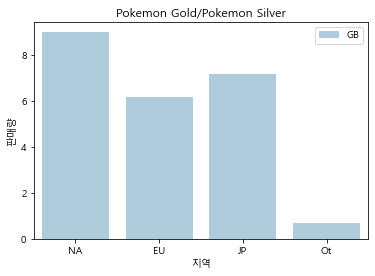

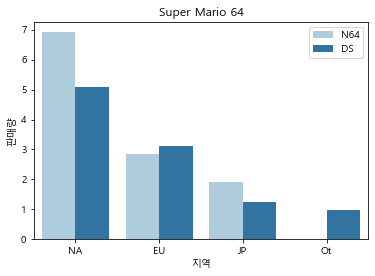

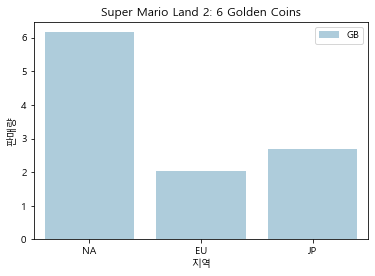

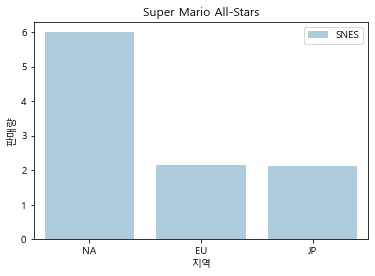

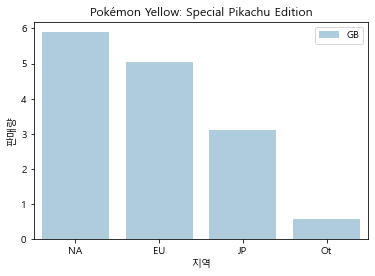

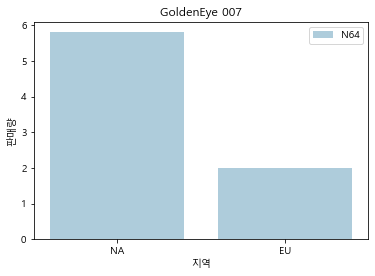

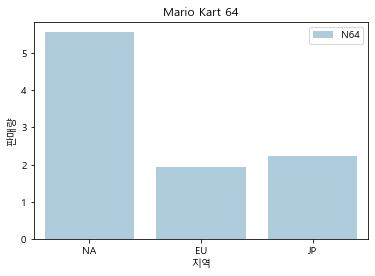

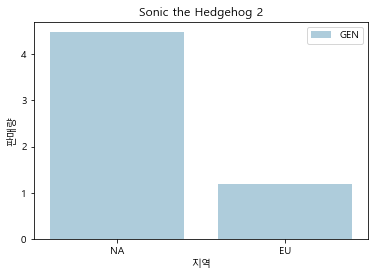

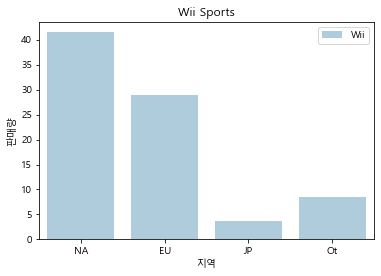

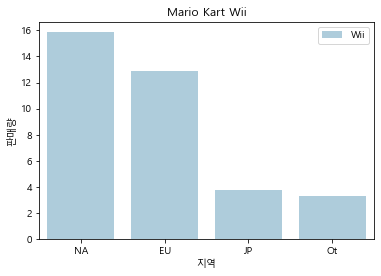

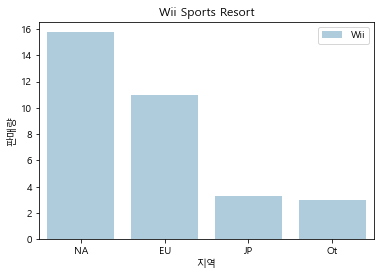

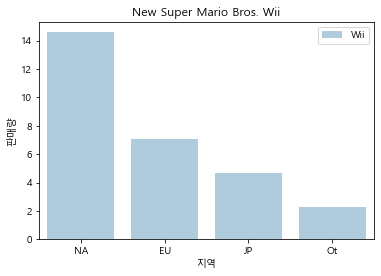

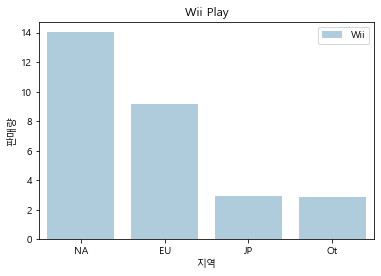

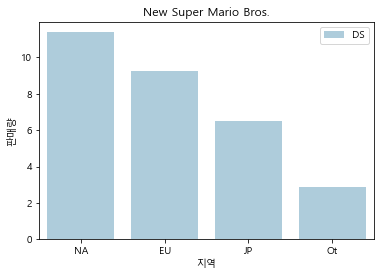

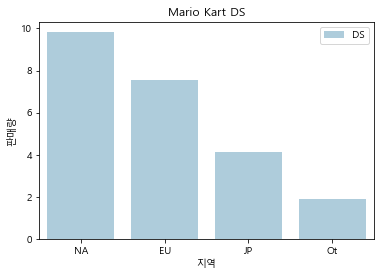

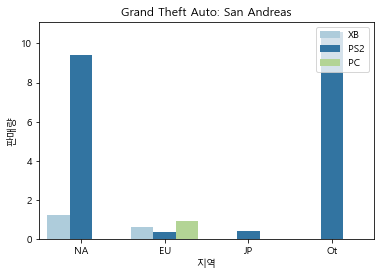

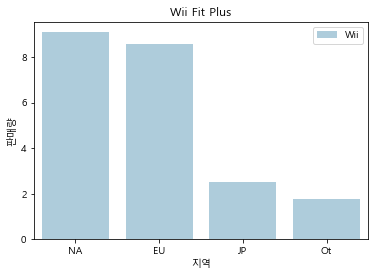

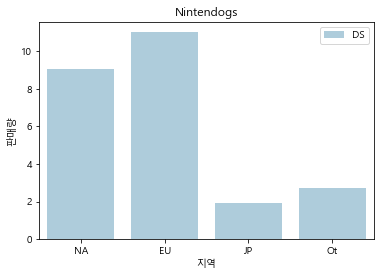

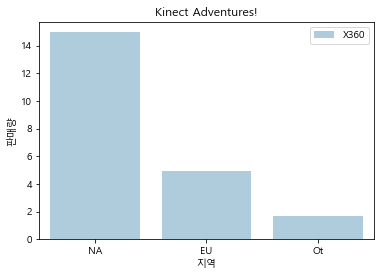

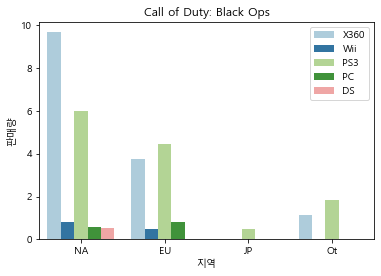

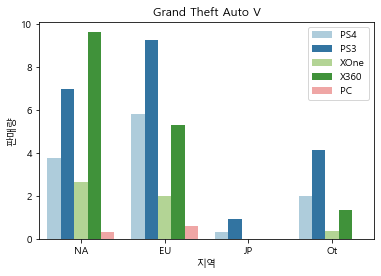

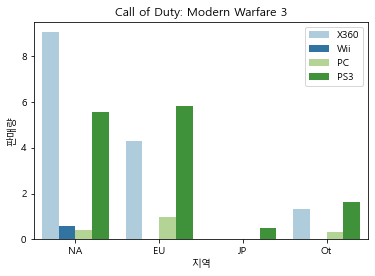

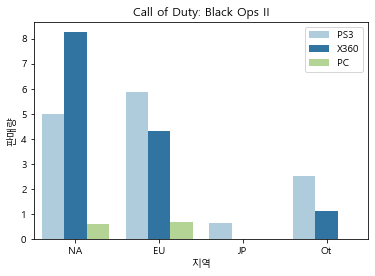

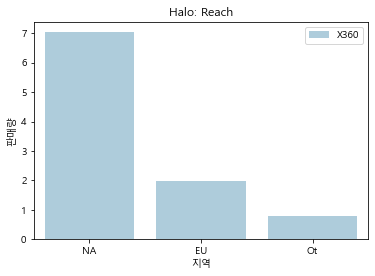

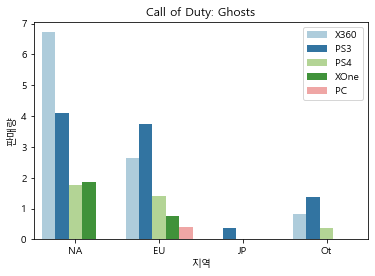

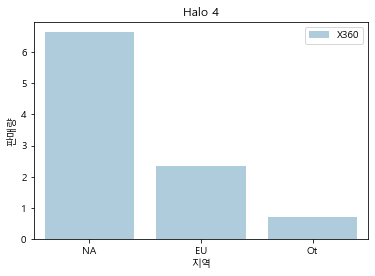

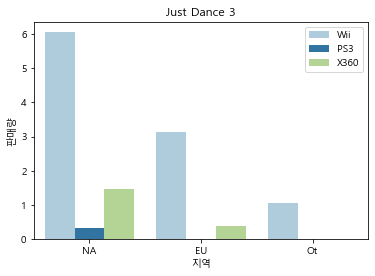

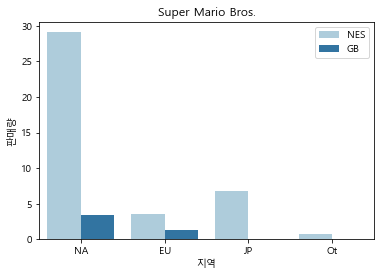

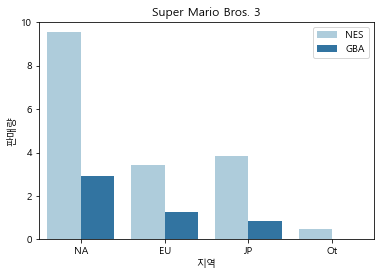

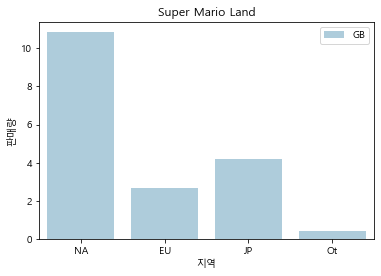

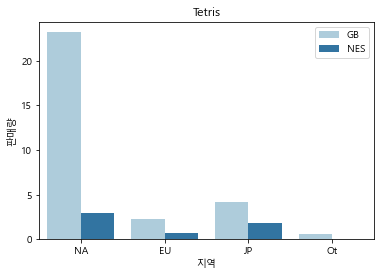

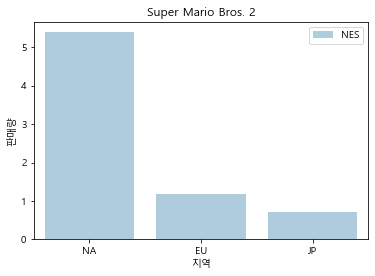

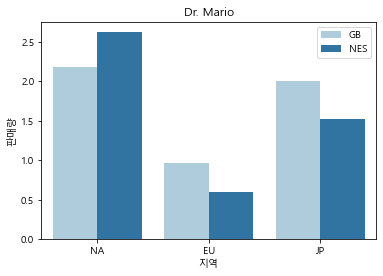

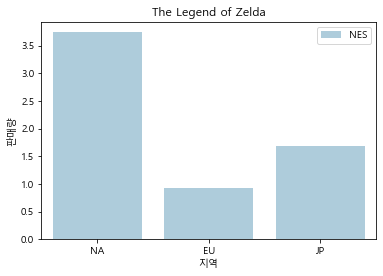

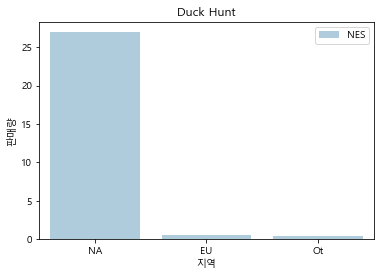

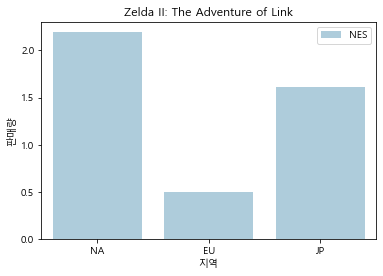

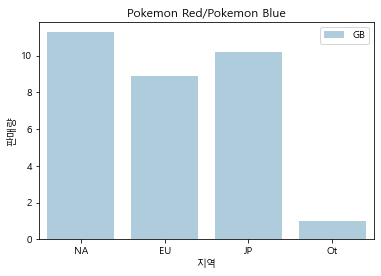

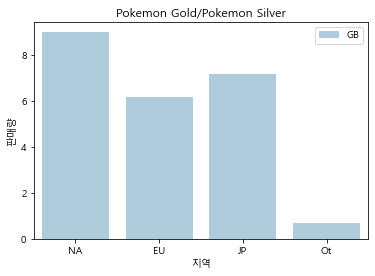

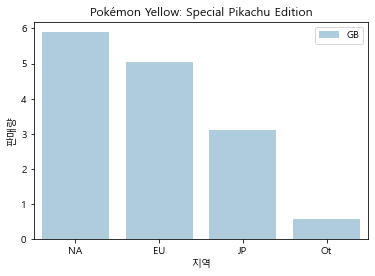

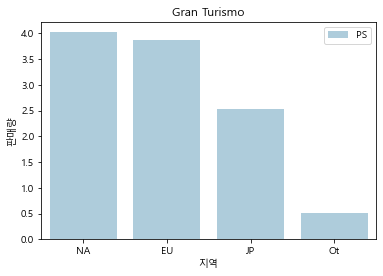

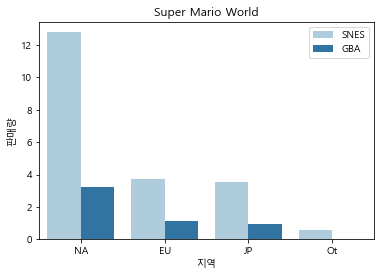

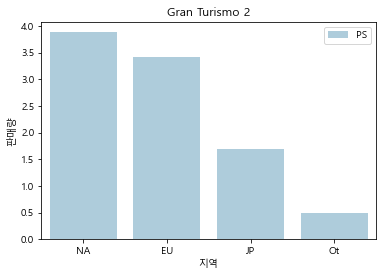

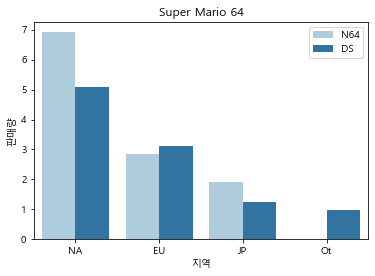

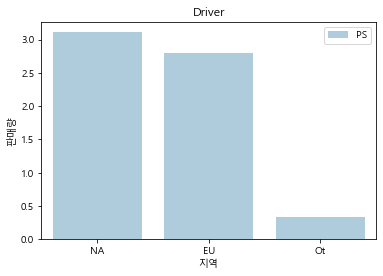

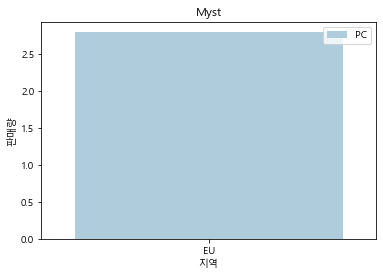

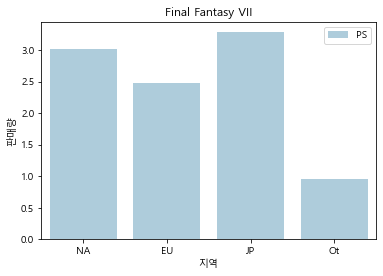

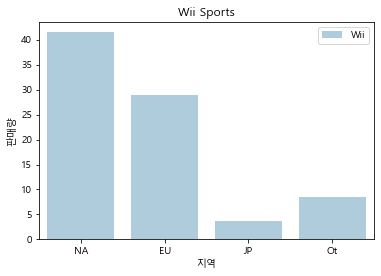

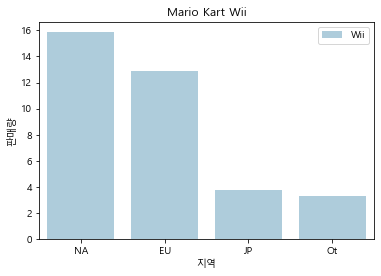

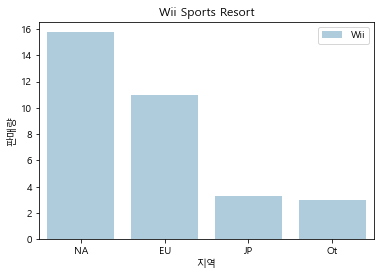

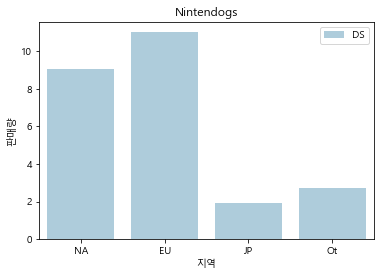

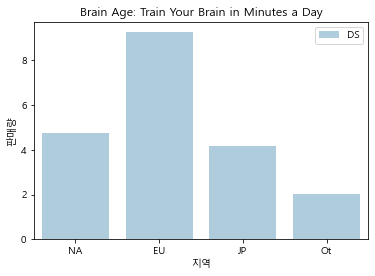

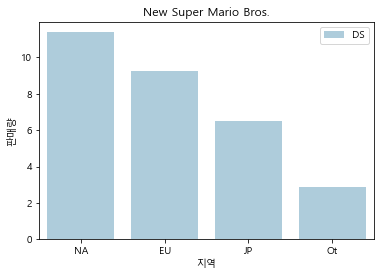

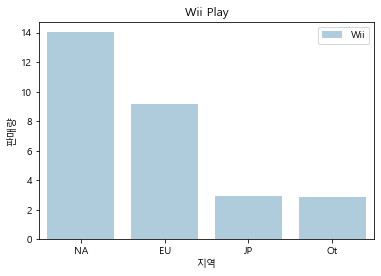

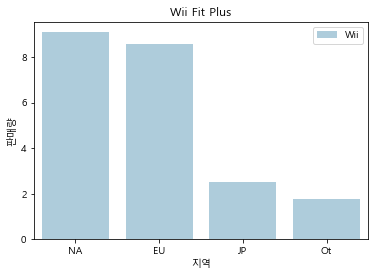

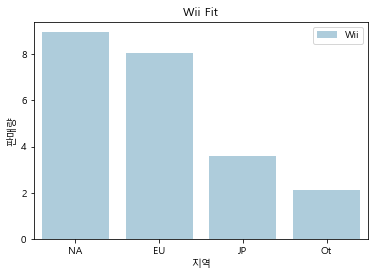

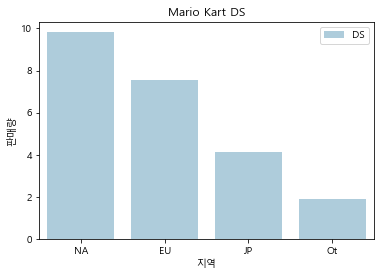

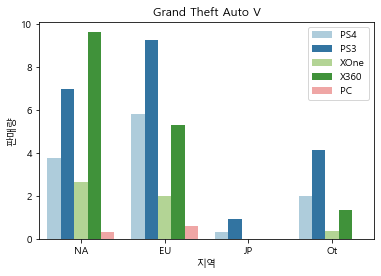

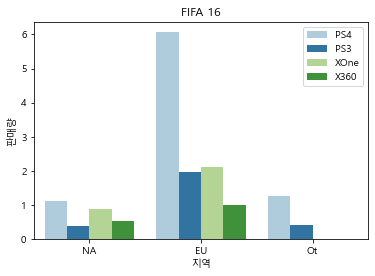

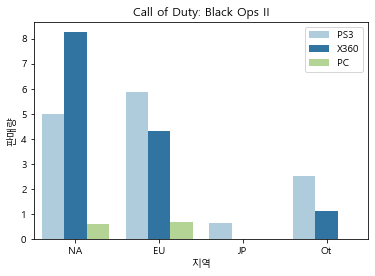

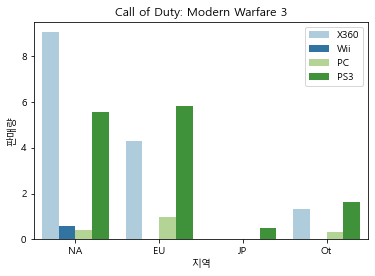

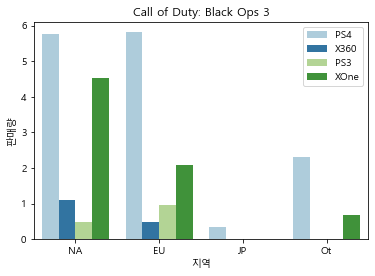

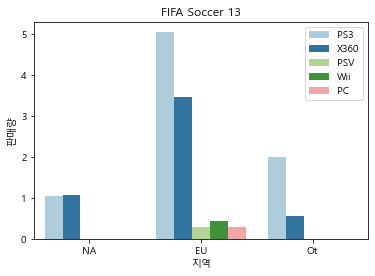

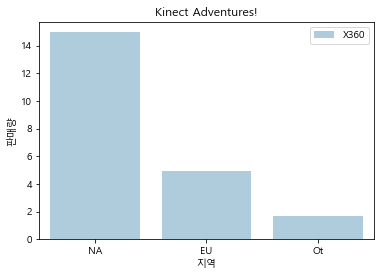

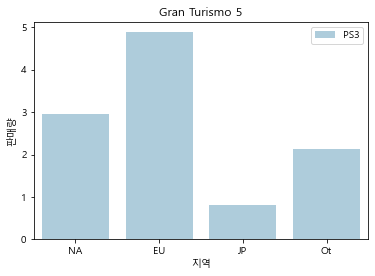

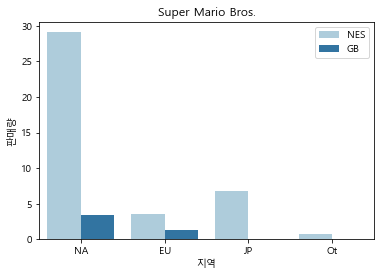

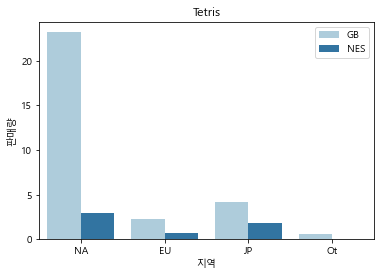

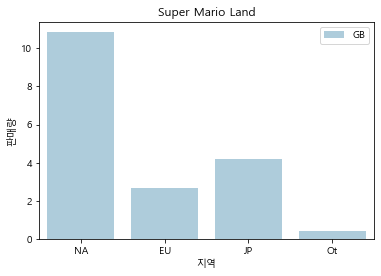

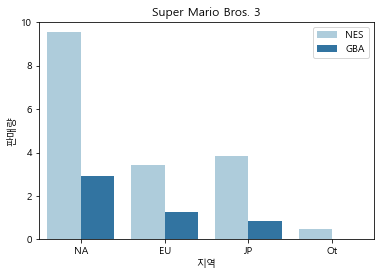

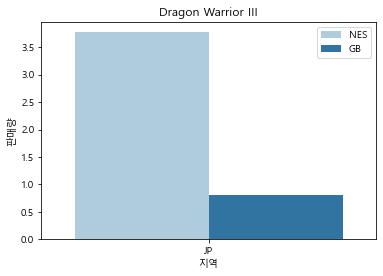

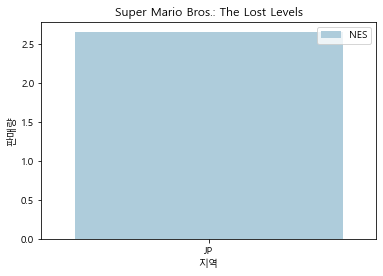

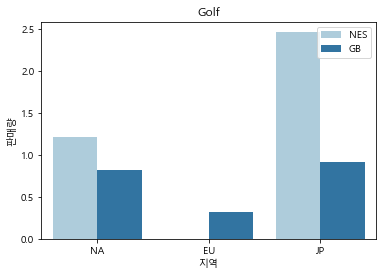

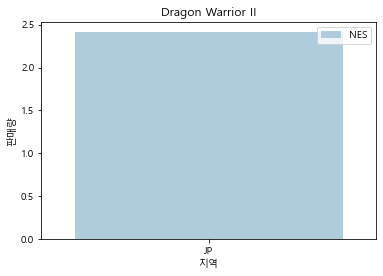

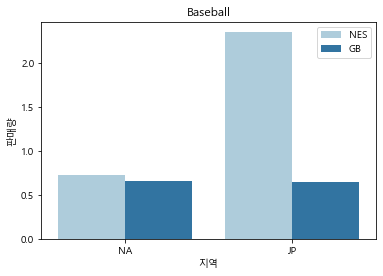

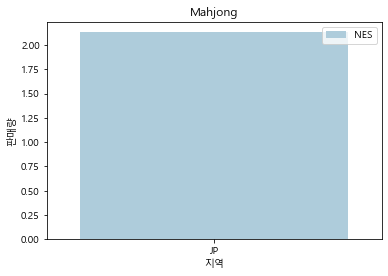

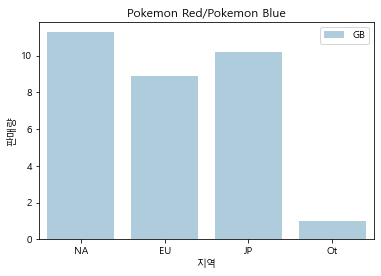

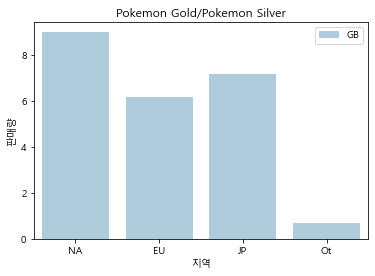

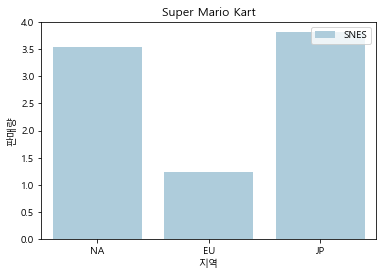

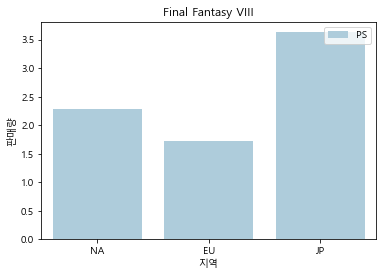

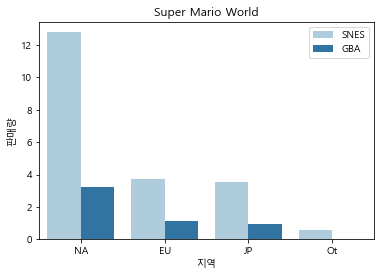

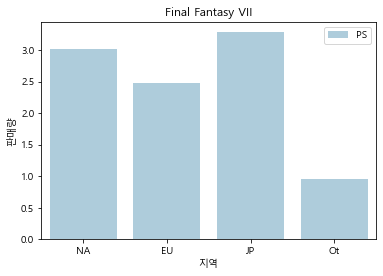

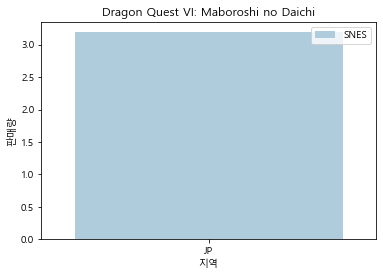

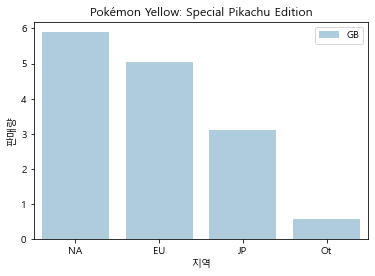

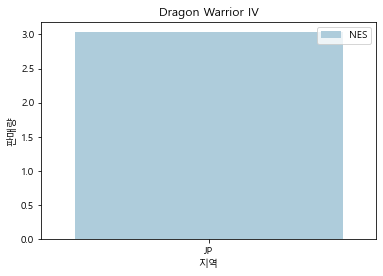

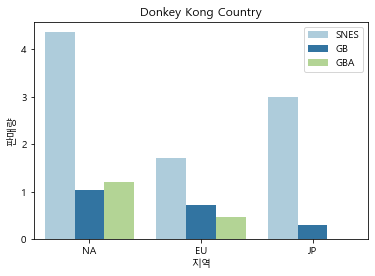

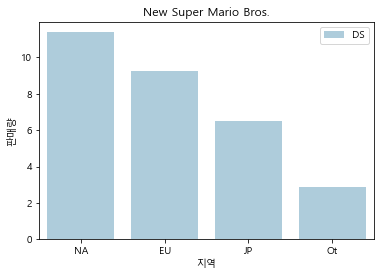

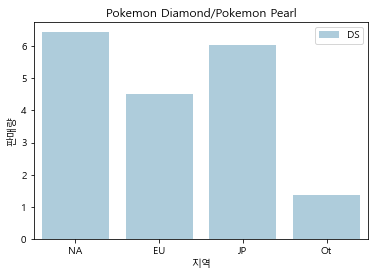

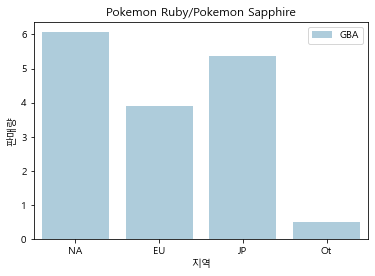

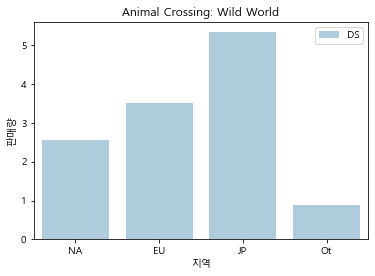

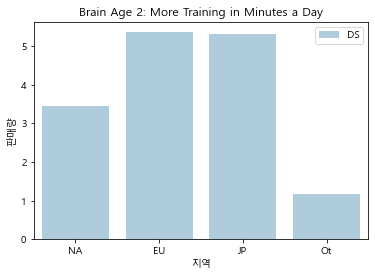

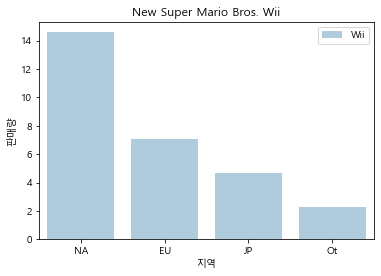

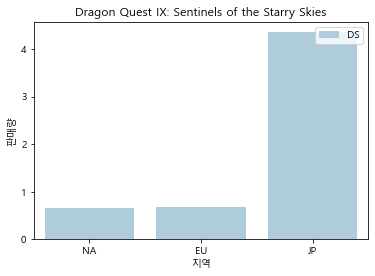

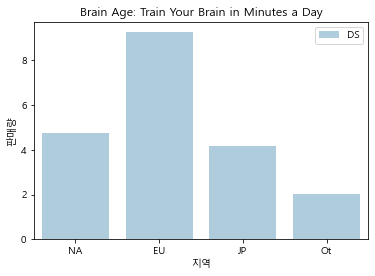

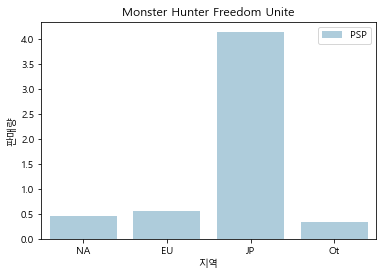

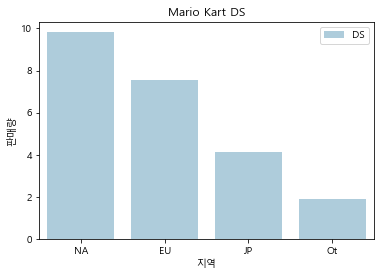

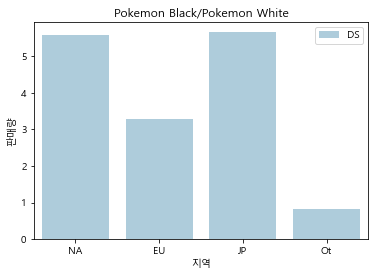

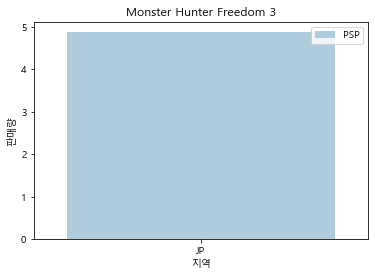

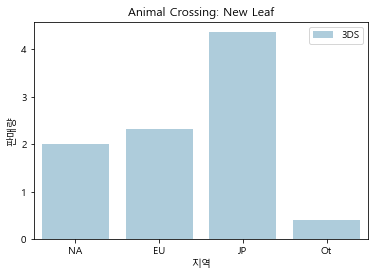

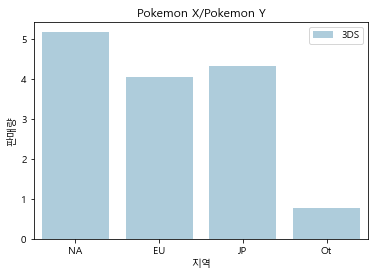

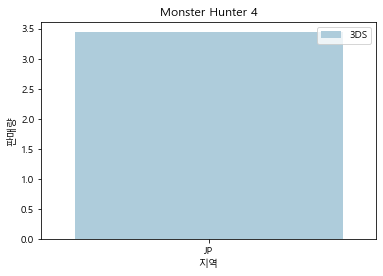

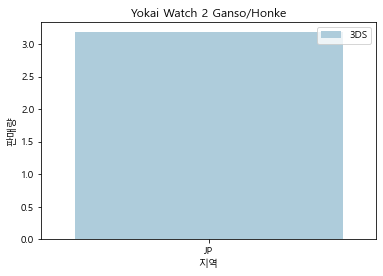

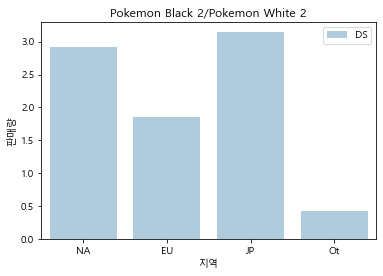

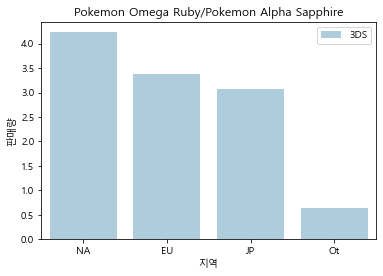

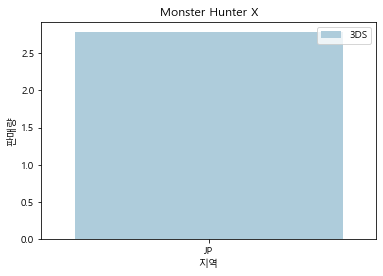

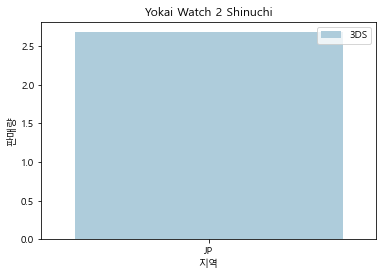

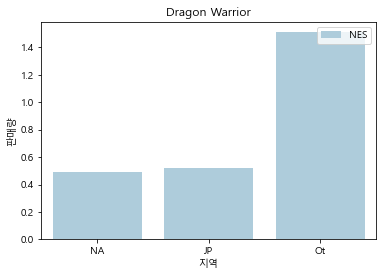

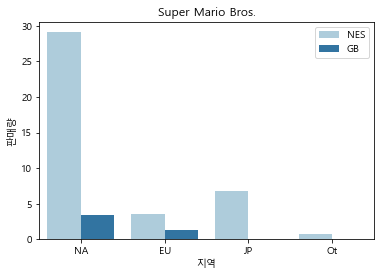

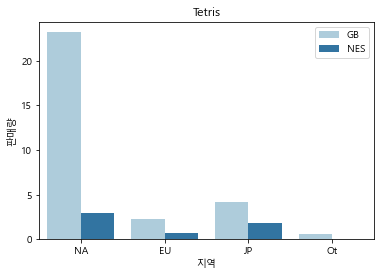

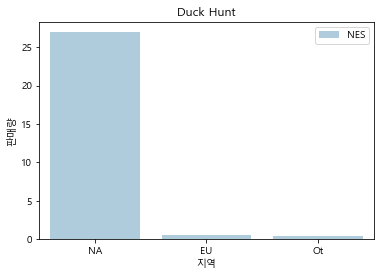

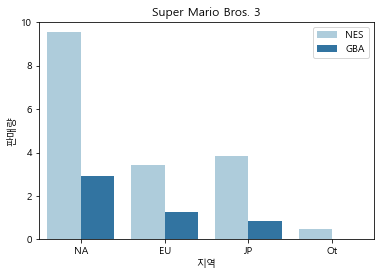

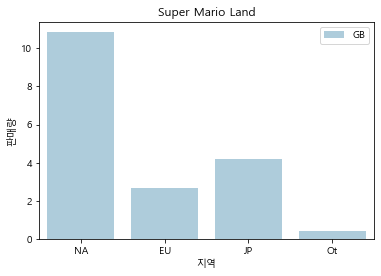

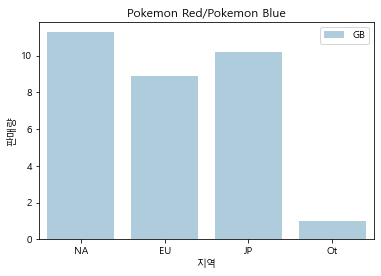

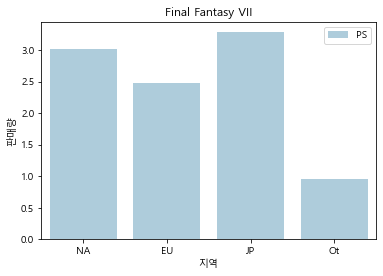

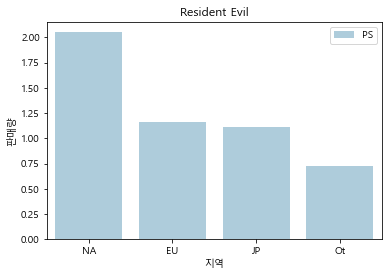

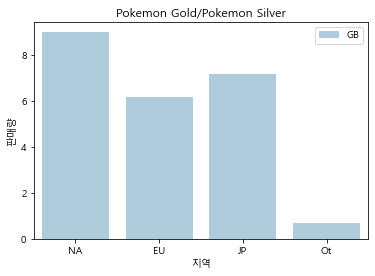

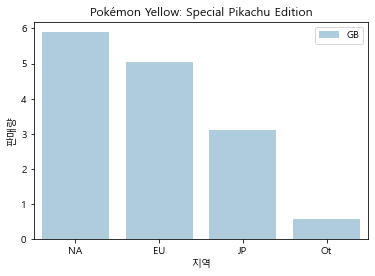

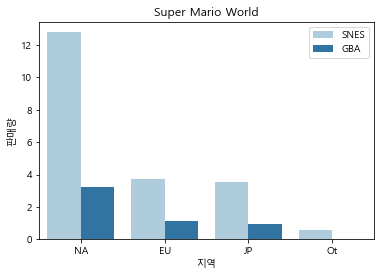

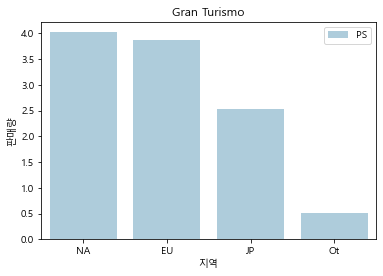

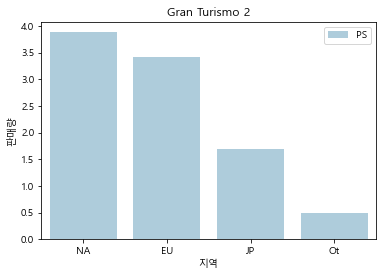

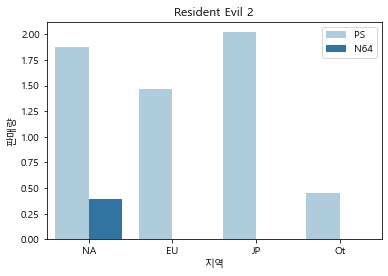

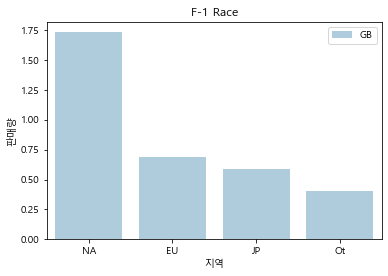

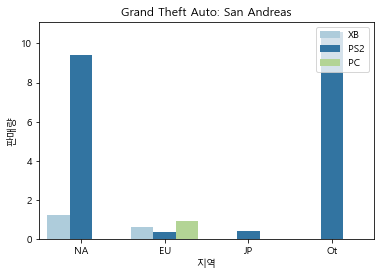

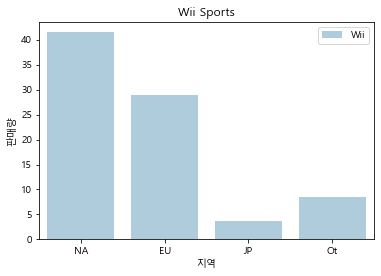

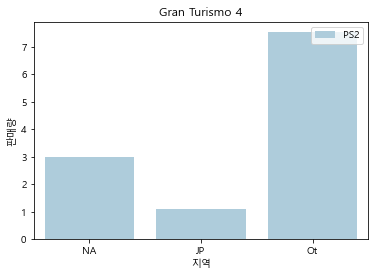

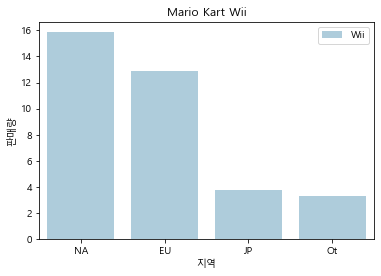

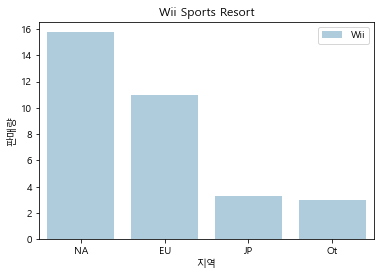

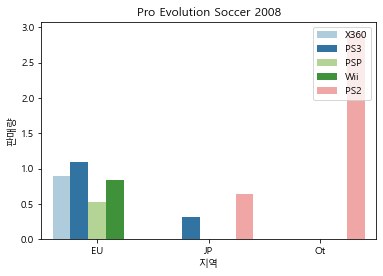

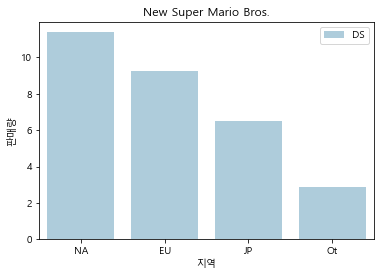

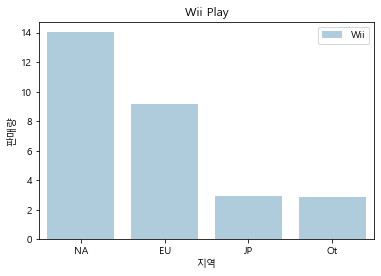

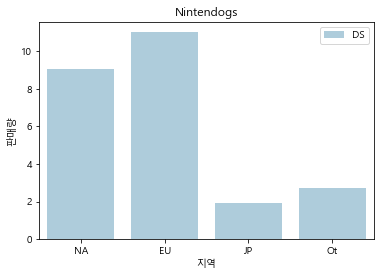

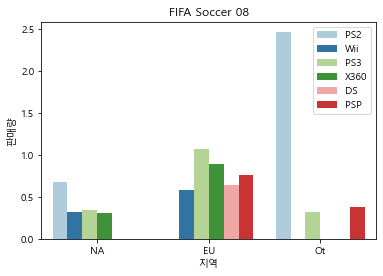

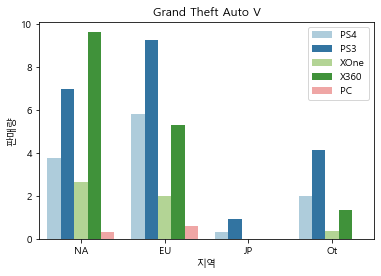

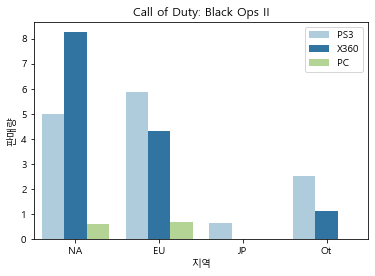

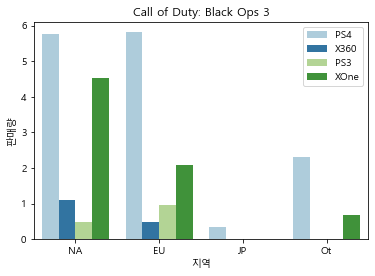

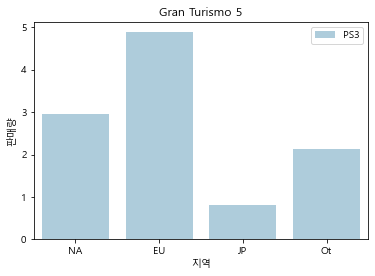

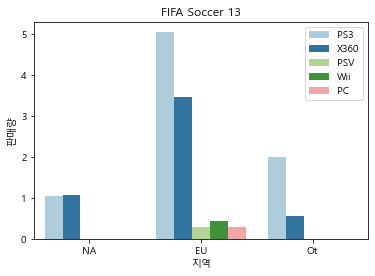

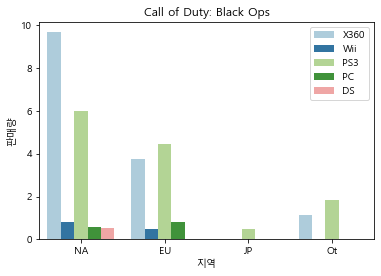

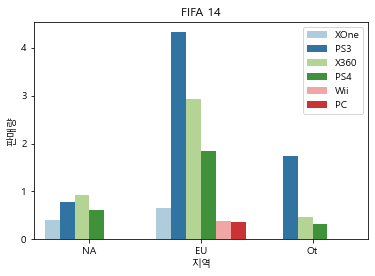

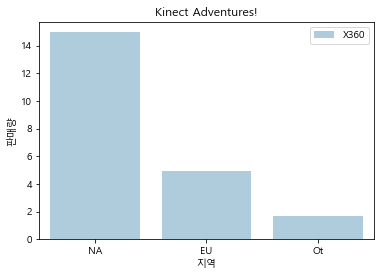

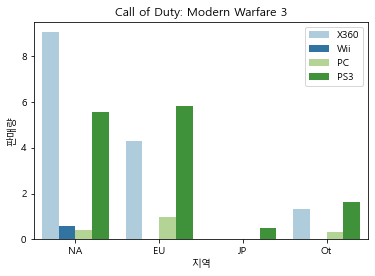

In [92]:
import re
for i in game_name.keys():
    for j in game_name[i]:
        sns.barplot(y='판매량',x="지역",hue='플랫폼',data=best_seller.query(f"게임이름=='{j}'"))
        plt.title(j)
        plt.legend(loc='upper right')
        plt.savefig(f'게임별%s.png'%(re.sub(r'[/:]','_',j)), transparent = True)
        plt.show()

In [ ]:
#흥행 게임순으로 그래프를 산출한 결과, 상위랭크에 Nintendo가 대거 포진되어있음을 알 수 있었고, 시간이 갈수록 유명 IP의 시리즈가
#장르를 막론하고 대부분의 상위랭크를 차지함을 알 수 있었음.
#즉, IP의 힘이 있다면 흥행을 기대할 수 있을것임, 최근 신규 IP가 흥행을 기록한 장르는 Action 혹은 Shooter
#또한 일본을 제외하면, Nintendo 위주였던 상위랭크 시장이 2010년에 접어들어서는 다변화 되었음을 알 수 있음

In [94]:
df['All_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [96]:
df.query('Genre=="Action"').All_Sales.sum()/df.All_Sales.sum()

0.19553138655566235